In [1]:
#https://www.kaggle.com/code/yasserh/housing-price-prediction-best-ml-algorithms

In [136]:
import pandas as pd
import numpy as np
import missingno as msno
from summarytools import dfSummary
from pandas_dq import dq_report, Fix_DQ
# from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from statsmodels.formula import api
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
# from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from keras.callbacks import History 
history = History()
from keras import regularizers
from tensorflow.random import set_seed
import random as python_random
import keras_tuner as kt
from tensorflow_addons.metrics import RSquare
# def reset_seeds():
#     np.random.seed(42) 
#     python_random.seed(42)
#     set_seed(42)

# reset_seeds() 

In [172]:
# ! pip freeze > requirements.txt

In [178]:
!python --version

Python 3.10.13


In [3]:
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)
import keras as ks
# 5. Configure a new global `tensorflow` session
from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
tf.keras.utils.set_random_seed(
    seed_value
)
ks.utils.set_random_seed(seed_value)

In [4]:
# !pip install tensorflow==2.14

In [5]:
raw_data = pd.read_csv('Housing.csv')

In [6]:
dfSummary(raw_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,price[int64],Mean (sd) : 4766729.2 (1870439.6)min < med < max:1750000.0 < 4340000.0 < 13300000.0IQR (CV) : 2310000.0 (2.5),219 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpklEQVR4nO3dvY7aQBRA4Tth2Zgf2SCy0NFSRKKg5CHysHmEFLRIiDegQzIIBIFgjFNtFRawx17mOufrB7s4Ync8jMckSSKA6748+waAR7wU+eHGmJqIvFp8xClJkkNe9wO9CgvVGFPrdDo/fN9vZ/2M7Xa7Nsb8JFYU+Y366vt+ezweH4IgOKYdvNlsvMlk0g7D8FVECPU/V+iffhGRIAiO3W73d8bhtVxvBmoxmYIKhAoVCBUqECpUIFSoQKhQofDHUzbiOK6KiG+MyTKcVa0ScTbU/X5fjaJo2O/3K5VKJfWCAata5eJsqKfT6cXzvPpoNDr2er11mrGsapWPs6G+azQaWVe2WNUqESZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQwflf+GdluTFQhM2BTillqLYbA0XYHOiaUoZqszFQhM2BLiplqO8sNgaKsDnQKUymoAKhQgVChQqEChUIFSoQKlQgVKhw9zmqxel7/uVyqWYYB/zjZqg2p+9FUeTFcfz9eDz+EpGsD90BEbn/jZr59L3FYtGez+f18/lcsbg/QEQeXELNcvreer1mCRK5YTIFFQgVKpT611M2OJHFLYR6BSeyuIdQr+BEFvcQ6g2cyOIOJlNQgVChAqFCBUKFCoQKFZj1F4DFgvwRas5YLCgGoeaMxYJiEGpBWCzIF5MpqMA3qmN4XeZ1hOoQXpf5MUJ1CK/L/BihOsjmdZlxHPvypGe4Flvr716bUEvkmc9wbbbWP3Lth0LdbDZe2gvvdjtPRGS/33vL5bL+meO1Xtv2vlerVdPzvPpgMDCtVutPmrGHw+HrdDp9C8PwmzFmm/baIuI3m8234XB4rtVqqa89m81u/svyF7tmgswM0k4rAAAAAElFTkSuQmCC"">",0(0.0%)
2,area[int64],Mean (sd) : 5150.5 (2170.1)min < med < max:1650.0 < 4600.0 < 16200.0IQR (CV) : 2760.0 (2.4),284 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrklEQVR4nO3du47aQBSA4TPhEgOJzWUDHS1FpBSUNKnS5mHTpgsSlDS8AQ1CQlwEgWAuqah2tcCMnZ3j/F8/4OJfYDyrY3O5XATw3bu3vgDgHvk0X9wYUxKRosNLHC6Xyy6p64FeqYVqjCk1Go3vYRjWbF9jvV4vjDE/iBVpfqIWwzCs9Xq9XRRF+0cXr1arYDAY1ObzeVFECPU/l+pXv4hIFEX7ZrP523J5KdGLgVpspqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFAh9QEULk6nU0FEQmOMzXLmVmWIt6Fut9tCHMdf2u12LpfLPTwSiLlV2eJtqIfDIR8EQbnb7e5brdbikbXMrcoeb0O9qlQqtrOrmFuVIWymoAKhQgVChQqEChUIFSp4v+u35XhYIMKBgVcyGarrYYEIBwa+yWSoLocFIhwY+CiToV45HBaIcGDgFTZTUOHmJ6rD0/fC8/lcsFgHPPNqqC5P34vjODidTp/3+/0vEbH9+gVE5PYnqvXT9yaTSW08HpePx2PO4foAEblzM2Xz9L3FYsFmBIlhMwUVCBUqECpUIFSoQKhQgVChAqFCBUKFCpn+7ykXTGnxC6G+gCkt/iHUFzClxT+E+gqmtPiDzRRUIFSoQKhQgVChApupFHAPNnmEmjDuwaaDUBPmeg+23+835/P5kzFmbXsJWYycUFNicw82iVFEy+VyY4z5KSI2672NnFA94jqKaDqdfhwOh1/b7fbTW/zscJgBIXLjj+SuUFerVfDou242m0BEZLvdBrPZrPwv12t97+taW3Ec54MgKHc6HVOtVv88sna3270fjUafHH52BPV6/VsURR8s1t78I/kLHzBcBt8kUIoAAAAASUVORK5CYII="">",0(0.0%)
3,bedrooms[int64],Mean (sd) : 3.0 (0.7)min < med < max:1.0 < 3.0 < 6.0IQR (CV) : 1.0 (4.0),6 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB3klEQVR4nO3dQW7CMBBG4ZkKAZGQI0TLMTgAh+hhewi2nCSqnEUDVcFdVK1Y0JaESPgP79tb9uJtrCHYU0oG5O7h1gcALjG69QFy5e6FmY07Ln9PKTV9nufeEeoZ7l4sFovnEMK8y/q6rl/d/YVY+0Oo541DCPP1et2UZblrszDGON1sNvOqqsZmRqg9IdQ/lGW5Wy6Xbx2WFr0f5s5xmYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWErP9xmgcf8C3bUHnwAaeyDdV48AEncg7VzHjwAV+4TEECoUICoUICoUICoUJC9rf+e3PlkMNsoIMOQs3ItUMOs+EOOgg1L52HHGbDHnQQaoauGHKYDXTQwWUKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEvg9Kn7k/BkMocLM8v8M5t9Q3X1qZpO+N75AOB6PoxjjtO3CGOP0cDiMzCy4u9LenfftY+/ZbPa0Wq0+iqLYt13cNM1ku90+VVX16O512/Vmtk8p/fr5zSd7tpx5nUdFEgAAAABJRU5ErkJggg=="">",0(0.0%)
4,bathrooms[int64],Mean (sd) : 1.3 (0.5)min < med < max:1.0 < 1.0 < 4.0IQR (CV) : 1.0 (2.6),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABzElEQVR4nO3dQWrCQBSH8fdKsAZkglg9hgfIIXrYHsKtJ

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# skim(raw_data)

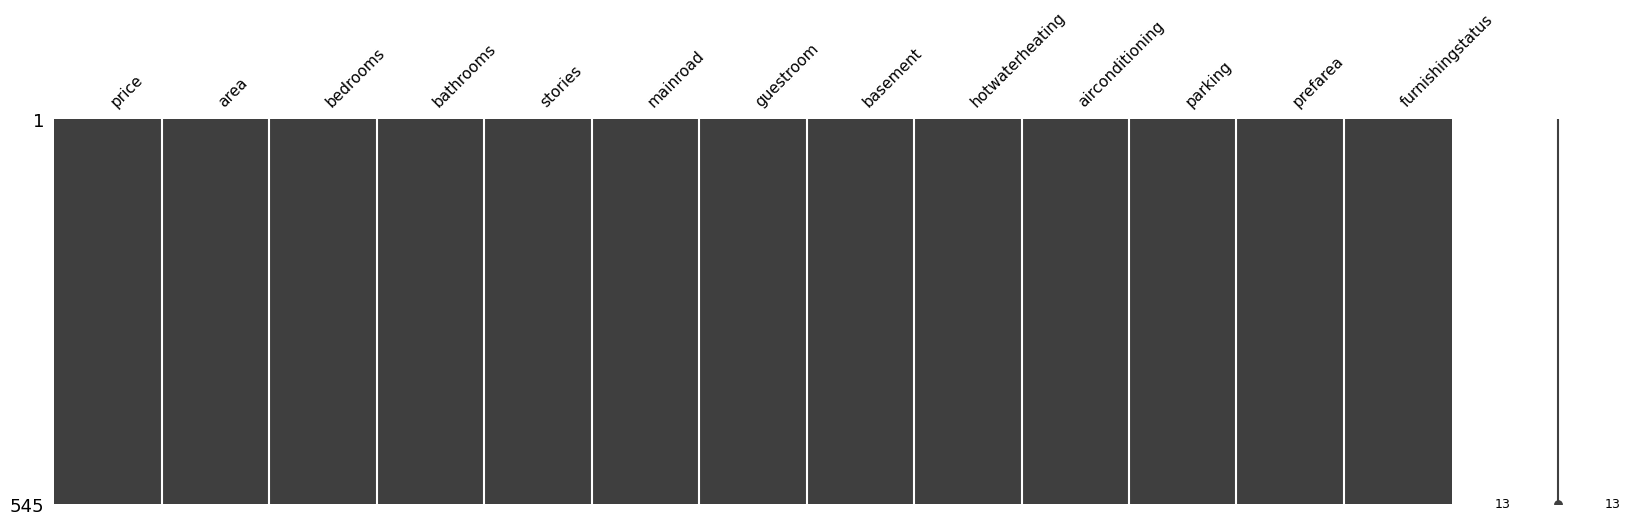

In [9]:
# Plot a matrix chart, set chart and font size
msno.matrix(raw_data, figsize=(20,5), fontsize=11);

In [10]:
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(raw_data.shape[1], raw_data.shape[0]))


Inference: The Datset consists of 13 features & 545 samples.


In [11]:
counter = 0
rs,cs = raw_data.shape

raw_data.drop_duplicates(inplace=True)

if raw_data.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-raw_data.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [12]:
#Check for empty elements

nvc = pd.DataFrame(raw_data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/raw_data.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
price                     0              0.0   
area                      0              0.0   
bedrooms                  0              0.0   
bathrooms                 0              0.0   
stories                   0              0.0   
mainroad                  0              0.0   
guestroom                 0              0.0   
basement                  0              0.0   
hotwaterheating           0              0.0   
airconditioning           0              0.0   
parking                   0              0.0   
prefarea                  0              0.0   
furnishingstatus          0              0.0   


## TARGET DATA

C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


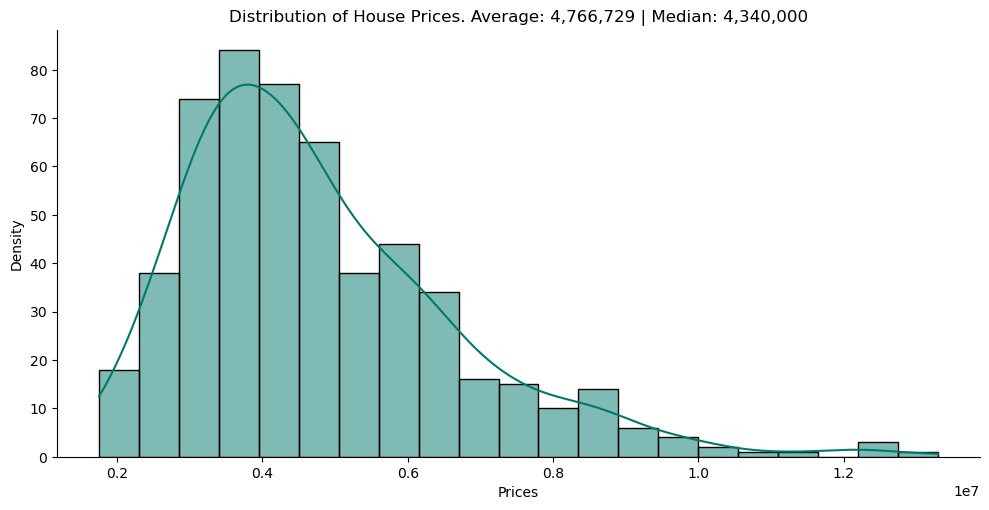

In [13]:
sns.displot(raw_data.price, 
            aspect=2,
            kde=True,
            color='#00796b')
plt.title(f'Distribution of House Prices. Average: {raw_data.price.mean():,.0f} | Median: {raw_data.price.median():,.0f}')
plt.xlabel('Prices')
plt.ylabel('Density')

plt.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\1707296889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data.price,
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


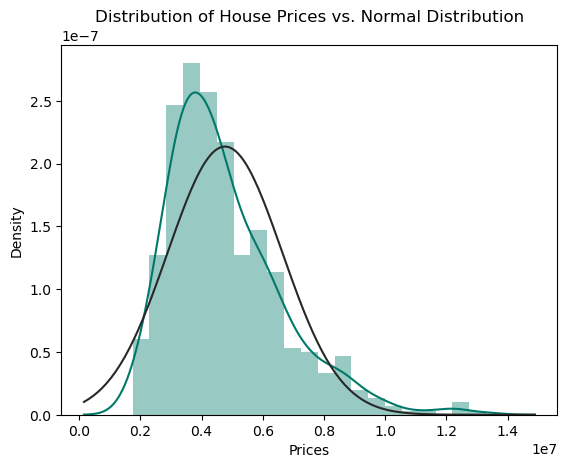

C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\1707296889.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(raw_data.price),
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


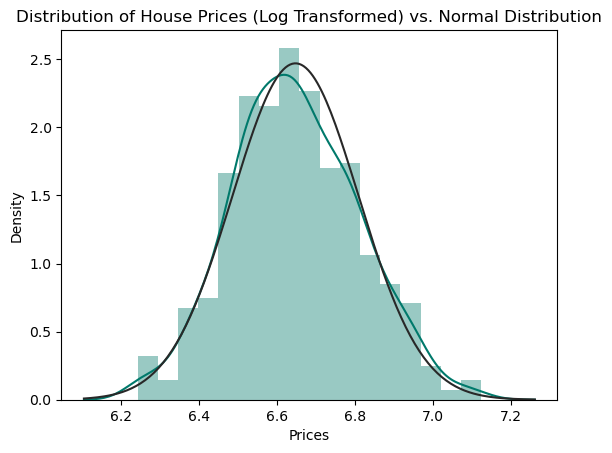

In [14]:



sns.distplot(raw_data.price, 
            kde=True, 
            fit=norm,
            color='#00796b')
plt.title(f'Distribution of House Prices vs. Normal Distribution')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.show();

sns.distplot(np.log10(raw_data.price), 
            kde=True, 
            fit=norm,
            color='#00796b')

plt.title(f'Distribution of House Prices (Log Transformed) vs. Normal Distribution')
plt.xlabel('Prices')
plt.ylabel('Density')

plt.show();

## CATEGORICAL DATA

In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


         proportion
mainroad           
yes         85.9%  
no          14.1%  


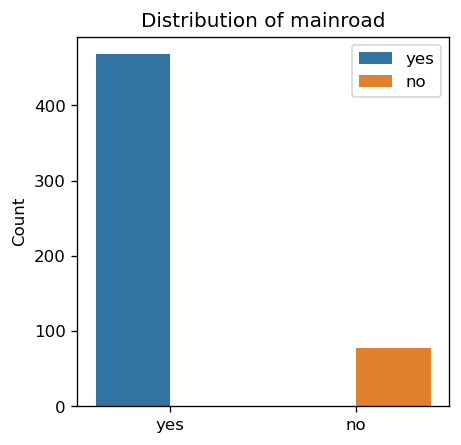

          proportion
guestroom           
no           82.2%  
yes          17.8%  


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


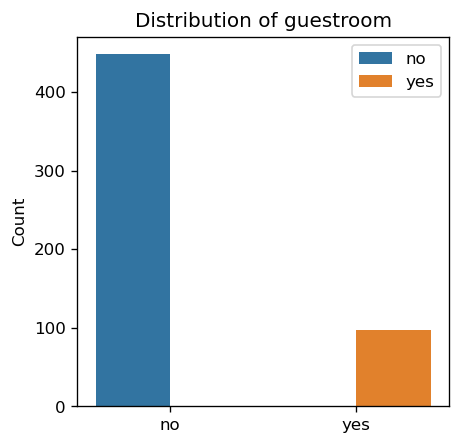

         proportion
basement           
no          65.0%  
yes         35.0%  


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


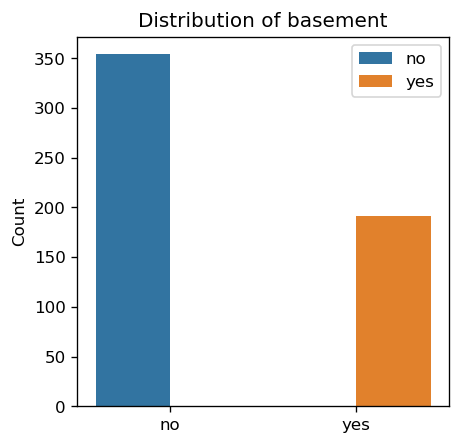

                proportion
hotwaterheating           
no                 95.4%  
yes                 4.6%  


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


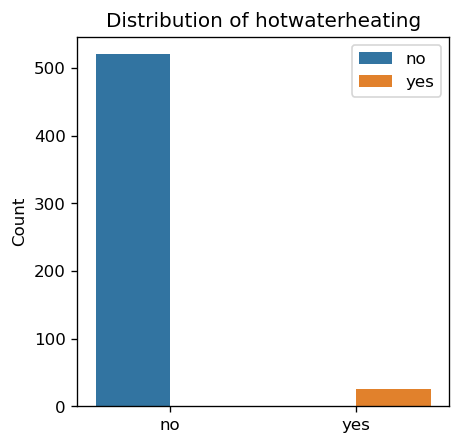

                proportion
airconditioning           
no                 68.4%  
yes                31.6%  


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


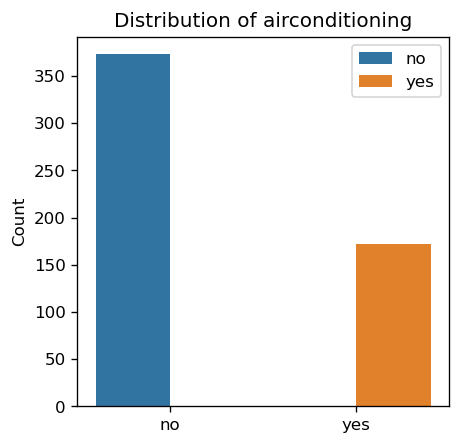

         proportion
prefarea           
no          76.5%  
yes         23.5%  


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


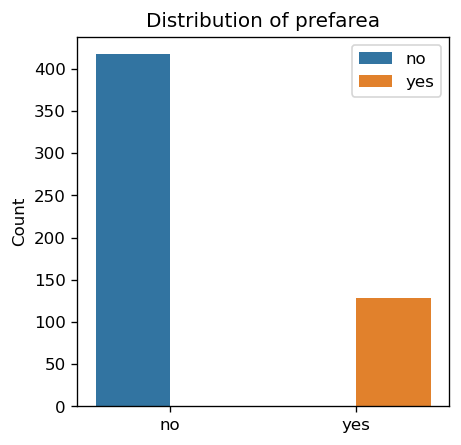

                 proportion
furnishingstatus           
semi-furnished      41.7%  
unfurnished         32.7%  
furnished           25.7%  


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


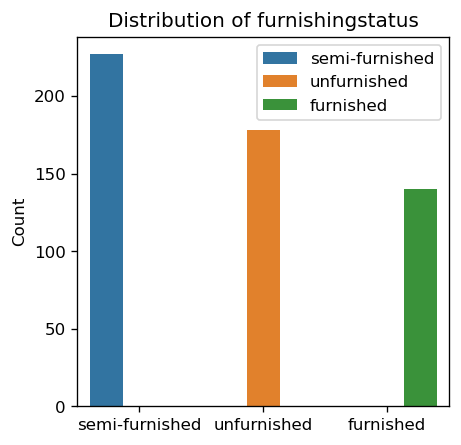

In [16]:
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    print(pd.DataFrame(raw_data[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'))

    plt.figure(figsize=(4, 4), dpi=120)
    sns.barplot(x=raw_data[column].value_counts().index.to_list(),
                y=raw_data[column].value_counts().values,
                hue=raw_data[column].value_counts().index.to_list())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

## NUMERICAL DATA

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\2440194436.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(raw_data[column],
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\2440194436.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

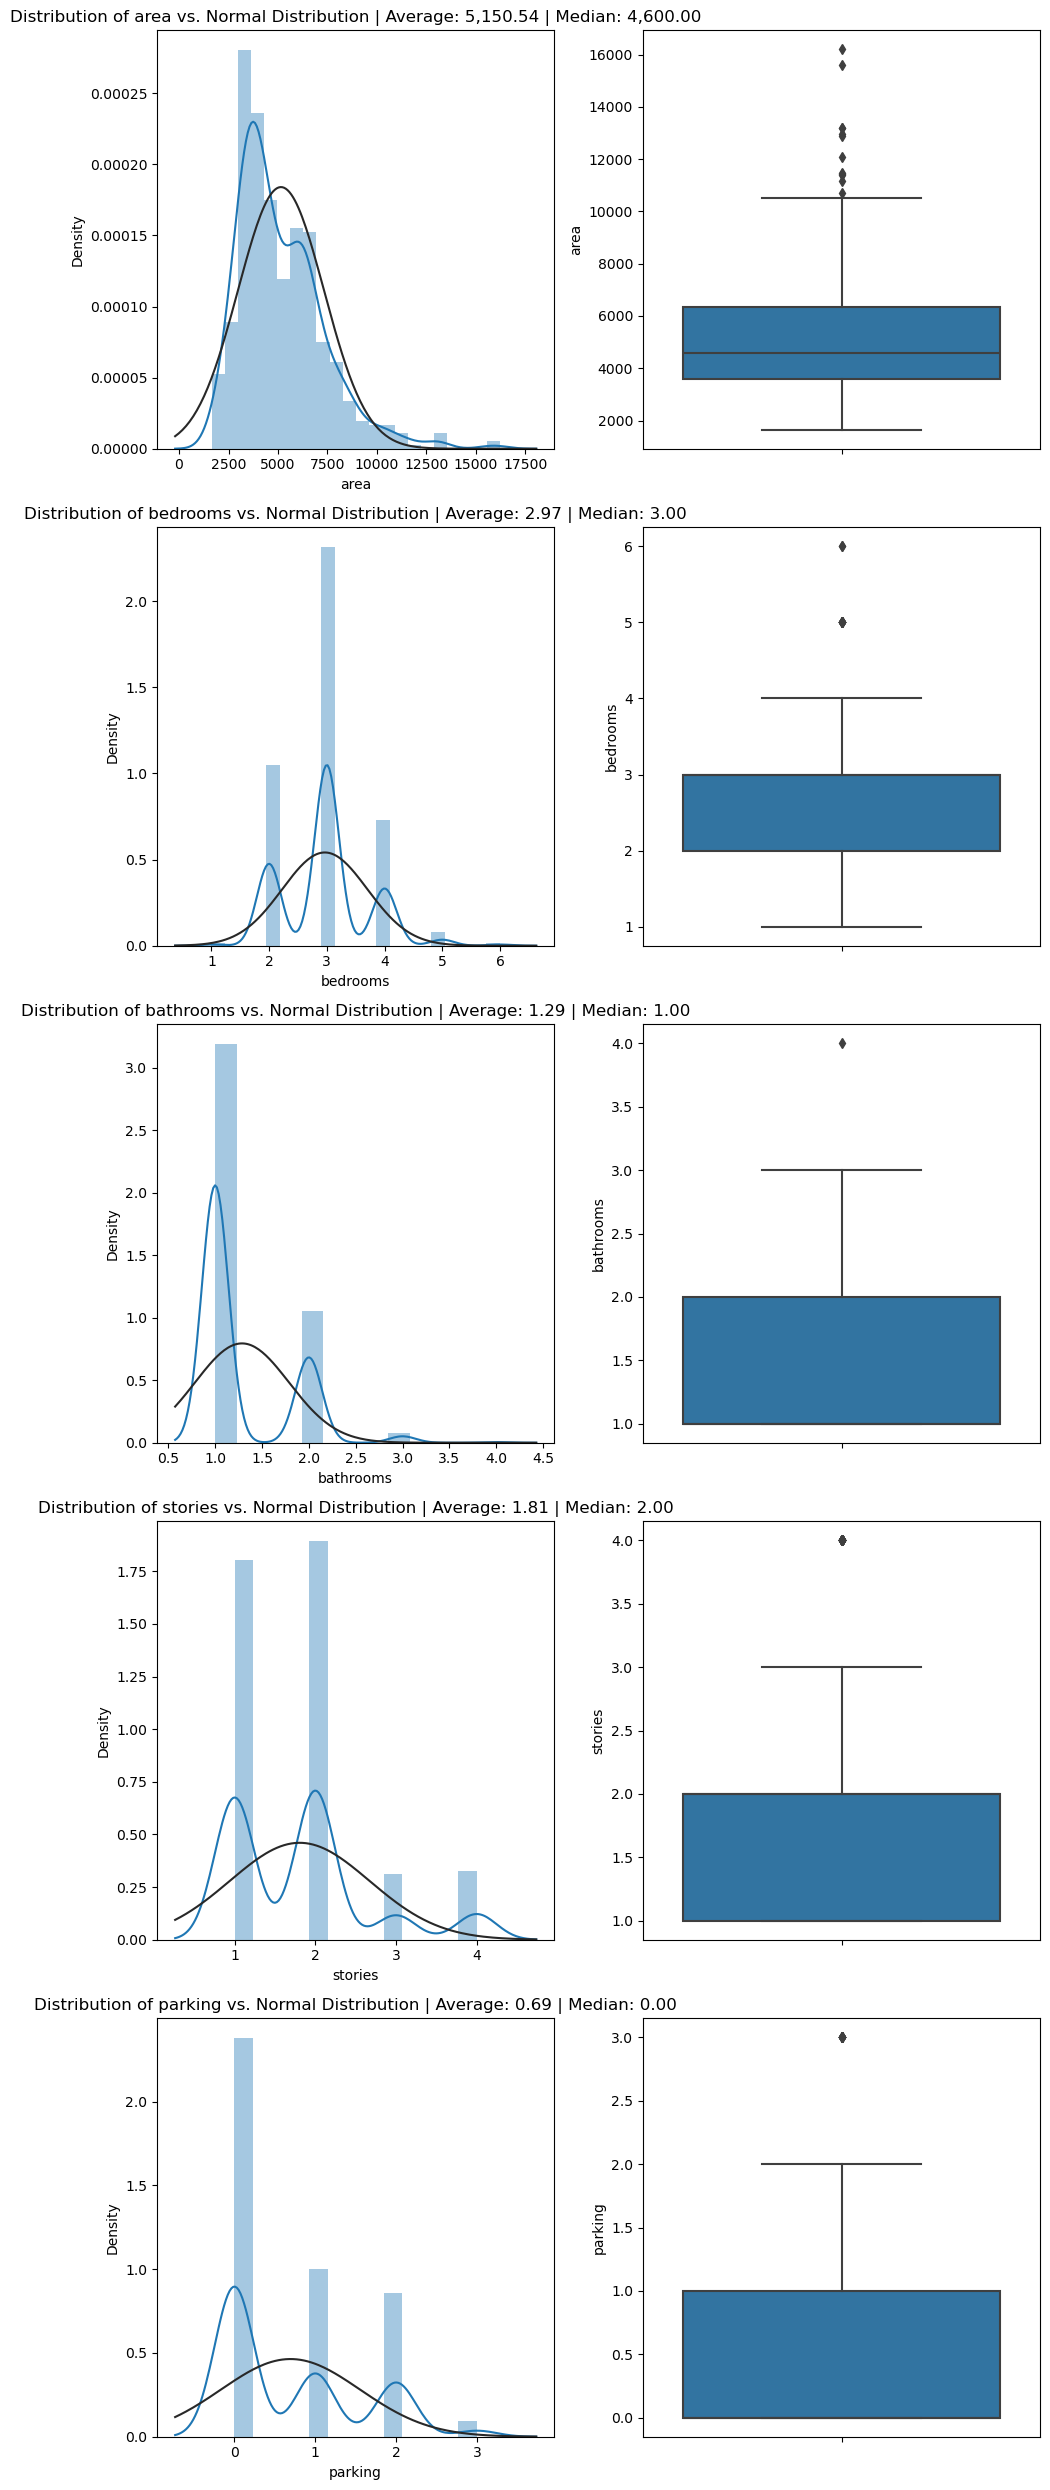

In [18]:
f, axes = plt.subplots(5, 2, figsize=(10,25))

for i, column in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], 0):
    # f.suptitle(f'Distribution of {column} vs. Normal Distribution | Average: {raw_data[column].mean():,.02f} | Median: {raw_data[column].median():,.02f}')
    axes[i, 0].set_title(f'Distribution of {column} vs. Normal Distribution | Average: {raw_data[column].mean():,.02f} | Median: {raw_data[column].median():,.02f}')
    plot = sns.distplot(raw_data[column], 
            kde=True, 
            fit=norm,
            ax=axes[i, 0])
    # plot.xlabel('Prices')
    # plot.ylabel('Density')
    
    sns.boxplot(y=raw_data[column], ax=axes[i, 1])
plt.tight_layout()
plt.show();

## OUTLIERS

In [19]:
robust_scaler = RobustScaler()

numerical_features = ['area', 'price']

raw_data_outliers = raw_data.copy()

raw_data_outliers[numerical_features] = robust_scaler.fit_transform(raw_data_outliers[numerical_features])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in numerical_features :
    num_outliers = count_outliers(raw_data_outliers[feature])
    print(f'Number of outliers in {feature:<10}: {num_outliers:<7} | {(num_outliers/len(raw_data_outliers))*100:<5.02f} %')


Number of outliers in area      : 12      | 2.20  %
Number of outliers in price     : 15      | 2.75  %


In [20]:
#Removal of outlier:

raw_data_rm_outliers = raw_data_outliers.copy()

features = ['area', 'price']

for i in features:
    Q1 = raw_data_outliers[i].quantile(0.25)
    Q3 = raw_data_outliers[i].quantile(0.75)
    IQR = Q3 - Q1
    raw_data_rm_outliers = raw_data_rm_outliers[raw_data_rm_outliers[i] <= (Q3+(1.5*IQR))]
    raw_data_rm_outliers = raw_data_rm_outliers[raw_data_rm_outliers[i] >= (Q1-(1.5*IQR))]
    raw_data_rm_outliers = raw_data_rm_outliers.reset_index(drop=True)


print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(raw_data.shape[0]))

print('After removal of outliers, The dataset now has {} samples.'.format(raw_data_rm_outliers.shape[0]))


Inference:
Before removal of outliers, The dataset had 545 samples.
After removal of outliers, The dataset now has 520 samples.


C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\1180391546.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(raw_data_rm_outliers[column],
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\1180391546.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

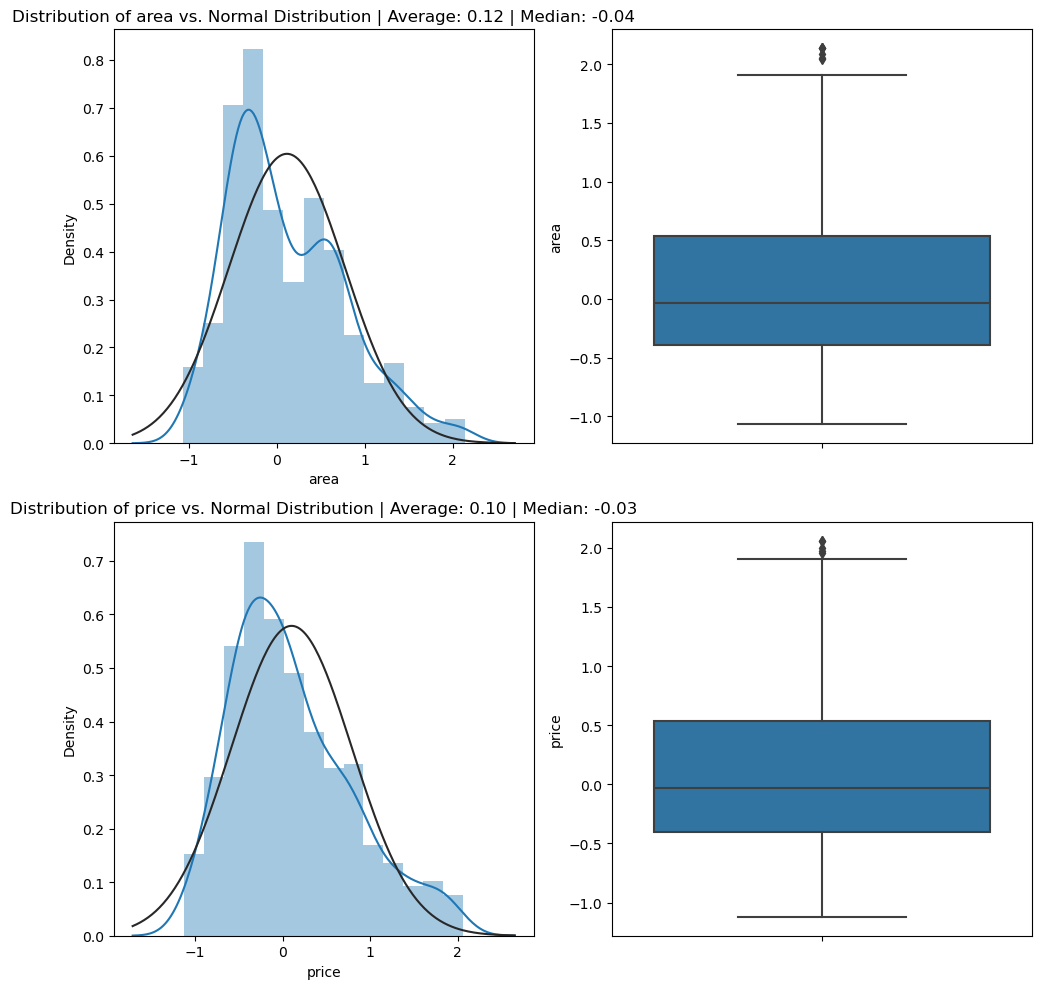

In [21]:
f, axes = plt.subplots(2, 2, figsize=(10,10))

for i, column in enumerate(['area', 'price'], 0):
    # f.suptitle(f'Distribution of {column} vs. Normal Distribution | Average: {raw_data[column].mean():,.02f} | Median: {raw_data[column].median():,.02f}')
    axes[i, 0].set_title(f'Distribution of {column} vs. Normal Distribution | Average: {raw_data_rm_outliers[column].mean():,.02f} | Median: {raw_data_rm_outliers[column].median():,.02f}')
    plot = sns.distplot(raw_data_rm_outliers[column], 
            kde=True, 
            fit=norm,
            ax=axes[i, 0])
    # plot.xlabel('Prices')
    # plot.ylabel('Density')
    
    sns.boxplot(y=raw_data_rm_outliers[column], ax=axes[i, 1])
plt.tight_layout()
plt.show();

## ONE HOT ENCODING

In [22]:
#Checking number of unique rows in each feature
features = raw_data.columns.tolist()
nu = raw_data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(raw_data[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 2 numerical & 11 categorical features.


In [23]:
#Converting categorical Columns to Numeric

raw_data_encoded = raw_data.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if raw_data_encoded[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        raw_data_encoded[i]=pd.get_dummies(raw_data_encoded[i], drop_first=True, prefix=str(i))
    if (raw_data_encoded[i].nunique()>2 and raw_data_encoded[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        raw_data_encoded = pd.concat([raw_data_encoded.drop([i], axis=1), pd.DataFrame(pd.get_dummies(raw_data_encoded[i], drop_first=True, prefix=str(i)))],axis=1)

raw_data_encoded.head()

One-Hot Encoding on features:
mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea

Dummy Encoding on features:
furnishingstatus
bathrooms
stories
parking
bedrooms


,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,13300000,7420,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
1,12250000,8960,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
2,12250000,9960,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False
3,12215000,7500,True,False,True,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
4,11410000,7420,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False


In [24]:
raw_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   mainroad                         545 non-null    bool 
 3   guestroom                        545 non-null    bool 
 4   basement                         545 non-null    bool 
 5   hotwaterheating                  545 non-null    bool 
 6   airconditioning                  545 non-null    bool 
 7   prefarea                         545 non-null    bool 
 8   furnishingstatus_semi-furnished  545 non-null    bool 
 9   furnishingstatus_unfurnished     545 non-null    bool 
 10  bathrooms_2                      545 non-null    bool 
 11  bathrooms_3                      545 non-null    bool 
 12  bathrooms_4                      545 non-null    b

In [25]:
raw_data_encoded.replace({False: 0, True: 1}, inplace=True)

In [26]:
raw_data_encoded.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,13300000,7420,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,12250000,8960,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,12250000,9960,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
3,12215000,7500,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [27]:
raw_data_encoded.columns = [i.replace('-','_') for i in raw_data_encoded.columns]

In [28]:
raw_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   mainroad                         545 non-null    int64
 3   guestroom                        545 non-null    int64
 4   basement                         545 non-null    int64
 5   hotwaterheating                  545 non-null    int64
 6   airconditioning                  545 non-null    int64
 7   prefarea                         545 non-null    int64
 8   furnishingstatus_semi_furnished  545 non-null    int64
 9   furnishingstatus_unfurnished     545 non-null    int64
 10  bathrooms_2                      545 non-null    int64
 11  bathrooms_3                      545 non-null    int64
 12  bathrooms_4                      545 non-null    i

## ALTERNATIVE ENCODING

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [30]:
dfSummary(raw_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,price[int64],Mean (sd) : 4766729.2 (1870439.6)min < med < max:1750000.0 < 4340000.0 < 13300000.0IQR (CV) : 2310000.0 (2.5),219 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpklEQVR4nO3dvY7aQBRA4Tth2Zgf2SCy0NFSRKKg5CHysHmEFLRIiDegQzIIBIFgjFNtFRawx17mOufrB7s4Ync8jMckSSKA6748+waAR7wU+eHGmJqIvFp8xClJkkNe9wO9CgvVGFPrdDo/fN9vZ/2M7Xa7Nsb8JFYU+Y366vt+ezweH4IgOKYdvNlsvMlk0g7D8FVECPU/V+iffhGRIAiO3W73d8bhtVxvBmoxmYIKhAoVCBUqECpUIFSoQKhQofDHUzbiOK6KiG+MyTKcVa0ScTbU/X5fjaJo2O/3K5VKJfWCAata5eJsqKfT6cXzvPpoNDr2er11mrGsapWPs6G+azQaWVe2WNUqESZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQwflf+GdluTFQhM2BTillqLYbA0XYHOiaUoZqszFQhM2BLiplqO8sNgaKsDnQKUymoAKhQgVChQqEChUIFSoQKlQgVKhw9zmqxel7/uVyqWYYB/zjZqg2p+9FUeTFcfz9eDz+EpGsD90BEbn/jZr59L3FYtGez+f18/lcsbg/QEQeXELNcvreer1mCRK5YTIFFQgVKpT611M2OJHFLYR6BSeyuIdQr+BEFvcQ6g2cyOIOJlNQgVChAqFCBUKFCoQKFZj1F4DFgvwRas5YLCgGoeaMxYJiEGpBWCzIF5MpqMA3qmN4XeZ1hOoQXpf5MUJ1CK/L/BihOsjmdZlxHPvypGe4Flvr716bUEvkmc9wbbbWP3Lth0LdbDZe2gvvdjtPRGS/33vL5bL+meO1Xtv2vlerVdPzvPpgMDCtVutPmrGHw+HrdDp9C8PwmzFmm/baIuI3m8234XB4rtVqqa89m81u/svyF7tmgswM0k4rAAAAAElFTkSuQmCC"">",0(0.0%)
2,area[int64],Mean (sd) : 5150.5 (2170.1)min < med < max:1650.0 < 4600.0 < 16200.0IQR (CV) : 2760.0 (2.4),284 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrklEQVR4nO3du47aQBSA4TPhEgOJzWUDHS1FpBSUNKnS5mHTpgsSlDS8AQ1CQlwEgWAuqah2tcCMnZ3j/F8/4OJfYDyrY3O5XATw3bu3vgDgHvk0X9wYUxKRosNLHC6Xyy6p64FeqYVqjCk1Go3vYRjWbF9jvV4vjDE/iBVpfqIWwzCs9Xq9XRRF+0cXr1arYDAY1ObzeVFECPU/l+pXv4hIFEX7ZrP523J5KdGLgVpspqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFAh9QEULk6nU0FEQmOMzXLmVmWIt6Fut9tCHMdf2u12LpfLPTwSiLlV2eJtqIfDIR8EQbnb7e5brdbikbXMrcoeb0O9qlQqtrOrmFuVIWymoAKhQgVChQqEChUIFSp4v+u35XhYIMKBgVcyGarrYYEIBwa+yWSoLocFIhwY+CiToV45HBaIcGDgFTZTUOHmJ6rD0/fC8/lcsFgHPPNqqC5P34vjODidTp/3+/0vEbH9+gVE5PYnqvXT9yaTSW08HpePx2PO4foAEblzM2Xz9L3FYsFmBIlhMwUVCBUqECpUIFSoQKhQgVChAqFCBUKFCpn+7ykXTGnxC6G+gCkt/iHUFzClxT+E+gqmtPiDzRRUIFSoQKhQgVChApupFHAPNnmEmjDuwaaDUBPmeg+23+835/P5kzFmbXsJWYycUFNicw82iVFEy+VyY4z5KSI2672NnFA94jqKaDqdfhwOh1/b7fbTW/zscJgBIXLjj+SuUFerVfDou242m0BEZLvdBrPZrPwv12t97+taW3Ec54MgKHc6HVOtVv88sna3270fjUafHH52BPV6/VsURR8s1t78I/kLHzBcBt8kUIoAAAAASUVORK5CYII="">",0(0.0%)
3,bedrooms[int64],Mean (sd) : 3.0 (0.7)min < med < max:1.0 < 3.0 < 6.0IQR (CV) : 1.0 (4.0),6 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB3klEQVR4nO3dQW7CMBBG4ZkKAZGQI0TLMTgAh+hhewi2nCSqnEUDVcFdVK1Y0JaESPgP79tb9uJtrCHYU0oG5O7h1gcALjG69QFy5e6FmY07Ln9PKTV9nufeEeoZ7l4sFovnEMK8y/q6rl/d/YVY+0Oo541DCPP1et2UZblrszDGON1sNvOqqsZmRqg9IdQ/lGW5Wy6Xbx2WFr0f5s5xmYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWErP9xmgcf8C3bUHnwAaeyDdV48AEncg7VzHjwAV+4TEECoUICoUICoUICoUJC9rf+e3PlkMNsoIMOQs3ItUMOs+EOOgg1L52HHGbDHnQQaoauGHKYDXTQwWUKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEvg9Kn7k/BkMocLM8v8M5t9Q3X1qZpO+N75AOB6PoxjjtO3CGOP0cDiMzCy4u9LenfftY+/ZbPa0Wq0+iqLYt13cNM1ku90+VVX16O512/Vmtk8p/fr5zSd7tpx5nUdFEgAAAABJRU5ErkJggg=="">",0(0.0%)
4,bathrooms[int64],Mean (sd) : 1.3 (0.5)min < med < max:1.0 < 1.0 < 4.0IQR (CV) : 1.0 (2.6),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABzElEQVR4nO3dQWrCQBSH8fdKsAZkglg9hgfIIXrYHsKtJ

In [31]:
raw_data_encoded = raw_data.copy(deep=True)

In [32]:
raw_data_encoded.mainroad = raw_data_encoded.mainroad.map({'yes': 1, 'no': 0})
raw_data_encoded.guestroom = raw_data_encoded.guestroom.map({'yes': 1, 'no': 0})
raw_data_encoded.basement = raw_data_encoded.basement.map({'yes': 1, 'no': 0})
raw_data_encoded.hotwaterheating = raw_data_encoded.hotwaterheating.map({'yes': 1, 'no': 0})
raw_data_encoded.airconditioning = raw_data_encoded.airconditioning.map({'yes': 1, 'no': 0})
raw_data_encoded.prefarea = raw_data_encoded.prefarea.map({'yes': 1, 'no': 0})

raw_data_encoded.furnishingstatus = raw_data_encoded.furnishingstatus.map({'semi-furnished': 1, 'unfurnished': 0, 'furnished': 2})

In [33]:
raw_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## CORRELATION

                                                                Correlation Matrix                                                                


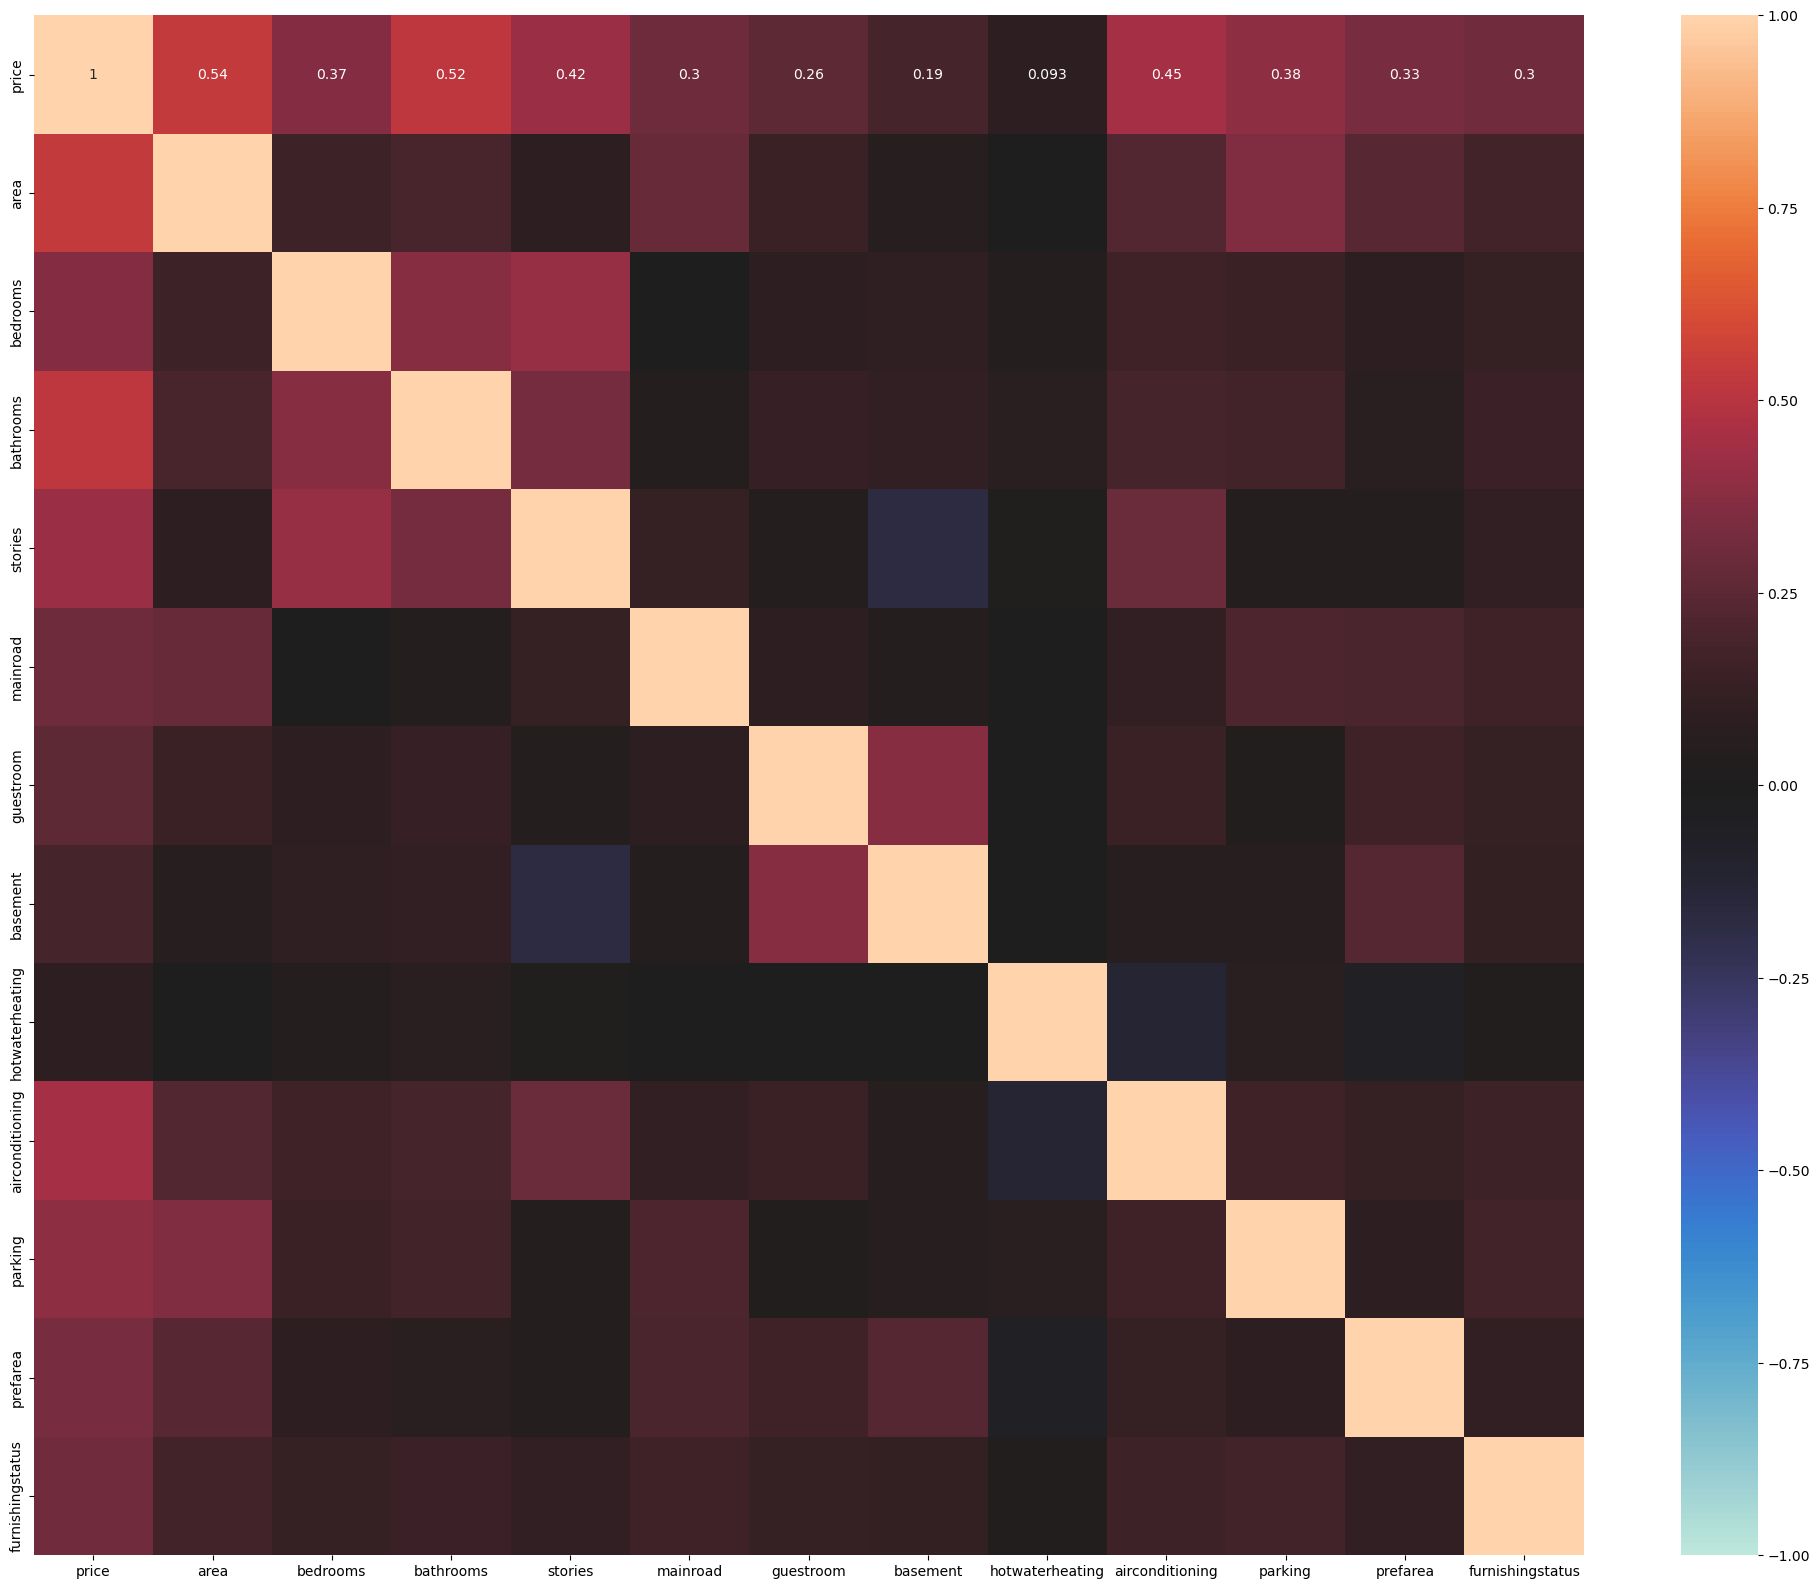

In [34]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(150))
plt.figure(figsize=[25,20])
sns.heatmap(raw_data_encoded.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## TRAIN/TEST SPLIT

In [139]:
X = raw_data_encoded.drop(['price'],axis=1)
Y = raw_data_encoded['price']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 12) (545,) 
Training set  --->  (436, 12) (436,) 
Testing set   --->  (109, 12)  (109,)


## FEATURES SCALING

In [140]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,436.000000
mean,1.222264e-16,1.629685e-16,7.333583e-17,6.926162e-17,1.711169e-16,9.778111e-17,-6.518741e-17,-4.889056e-17,0.000000,-6.518741e-17,-4.074213e-18,0.000000
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149
min,-1.591502e+00,-2.622298e+00,-5.579503e-01,-9.124989e-01,-2.456066e+00,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
25%,-7.058568e-01,-1.283514e+00,-5.579503e-01,-9.124989e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
50%,-2.970974e-01,5.527092e-02,-5.579503e-01,2.542152e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,0.079317
75%,5.476719e-01,5.527092e-02,1.539173e+00,2.542152e-01,4.071553e-01,-4.667731e-01,1.339728e+00,-2.305214e-01,1.501243,3.679566e-01,-5.526203e-01,1.409401
max,5.016775e+00,4.071624e+00,5.733420e+00,2.587644e+00,4.071553e-01,2.142369e+00,1.339728e+00,4.337993e+00,1.501243,2.709987e+00,1.809561e+00,1.409401



                                          Standardardization on Testing set                                          


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,-0.008182,0.042988,0.211636,0.136473,0.013134,-0.011969,-0.076556,-0.104782,0.089478,0.045659,0.010836,-0.067114
std,0.925314,0.937776,1.232791,1.052500,0.990922,0.994422,0.978521,0.750868,1.037592,1.043399,1.011379,1.060667
min,-1.568793,-1.283514,-0.557950,-0.912499,-2.456066,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
25%,-0.760358,0.055271,-0.557950,-0.912499,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
50%,-0.074551,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,0.079317
75%,0.547672,0.055271,1.539173,0.254215,0.407155,-0.466773,1.339728,-0.230521,1.501243,0.367957,-0.552620,1.409401
max,3.654243,2.732840,3.636297,2.587644,0.407155,2.142369,1.339728,4.337993,1.501243,2.709987,1.809561,1.409401


## SIMPLE LINEAR REGRESSION

In [141]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format('price',' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     76.81
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.36e-98
Time:                        21:05:50   Log-Likelihood:                -6635.6
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     423   BIC:                         1.335e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.707e+06   4.79e+04     98.289      0.000    4.61e+06     4.8e+06
area              5.193e+05   5.48e+04      9.475      0.000    4.12e+05    6.27e+05
bedrooms          5.869e+04   5.63e+04      1.043      0.297   -5.19e+04    1.69e+05
bathrooms         5.232e+05   5.45e+04      9.595      0.000    4.16e+05     6.3e+05
stories           3.482e+05    5.9e+04      5.905      0.000    2.32e+05    4.64e+05
mainroad          1.281e+05   5.21e+04      2.458      0.014    2.57e+04    2.31e+05
guestroom         8.936e+04   5.39e+04      1.659      0.098   -1.65e+04    1.95e+05
basement          1.885e+05   5.63e+04      3.348      0.001    7.78e+04    2.99e+05
hotwaterheating   1.506e+05   4.88e+04      3.086      0.002    5.47e+04    2.46e+05
airconditioning   3.624e+05   5.38e+04      6.737      0.000    2.57e+05    4.68e+05
parking           1.928e+05   5.27e+04      3.655      0.000    8.91e+04    2.96e+05
prefarea          2.667e+05   5.12e+04      5.207      0.000    1.66e+05    3.67e+05
furnishingstatus  1.582e+05   5.04e+04      3.138      0.002    5.91e+04    2.57e+05
==============================================================================
Omnibus:                       72.677   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.297
Skew:                           0.820   Prob(JB):                     2.13e-41
Kurtosis:                       5.760   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), API.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), API.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,331,071 |  R2: 0.649


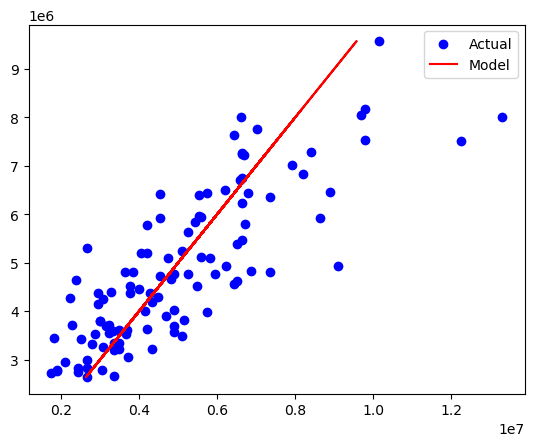

In [143]:
plt.scatter(Test_Y, API.predict(Test_X_std), color='b', label='Actual')
plt.plot(API.predict(Test_X_std), API.predict(Test_X_std), color='red', label='Model')
plt.legend()
plt.show()

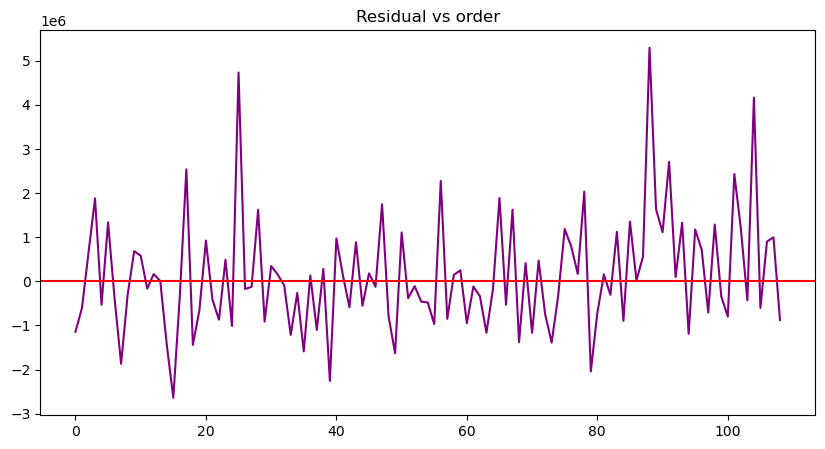

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     76.81
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.36e-98
Time:                        21:05:51   Log-Likelihood:                -6635.6
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     423   BIC:                         1.335e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.707e+06   4.79e+04     98.289      0.000    4.61e+06     4.8e+06
area              5.193e+05   5.48e+04      9.475      0.000    4.12e+05    6.27e+05
bedrooms          5.869e+04   5.63e+04      1.043      0.297   -5.19e+04    1.69e+05
bathrooms         5.232e+05   5.45e+04      9.595      0.000    4.16e+05     6.3e+05
stories           3.482e+05    5.9e+04      5.905      0.000    2.32e+05    4.64e+05
mainroad          1.281e+05   5.21e+04      2.458      0.014    2.57e+04    2.31e+05
guestroom         8.936e+04   5.39e+04      1.659      0.098   -1.65e+04    1.95e+05
basement          1.885e+05   5.63e+04      3.348      0.001    7.78e+04    2.99e+05
hotwaterheating   1.506e+05   4.88e+04      3.086      0.002    5.47e+04    2.46e+05
airconditioning   3.624e+05   5.38e+04      6.737      0.000    2.57e+05    4.68e+05
parking           1.928e+05   5.27e+04      3.655      0.000    8.91e+04    2.96e+05
prefarea          2.667e+05   5.12e+04      5.207      0.000    1.66e+05    3.67e+05
furnishingstatus  1.582e+05   5.04e+04      3.138      0.002    5.91e+04    2.57e+05
==============================================================================
Omnibus:                       72.677   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.297
Skew:                           0.820   Prob(JB):                     2.13e-41
Kurtosis:                       5.760   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(10, 5))
plt.title('Residual vs order')
plt.plot(API.predict(Test_X_std).index, Test_Y.reset_index(drop=True)-API.predict(Test_X_std), color='purple')
plt.axhline(y=0, color='red')
plt.show()
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
API.summary()

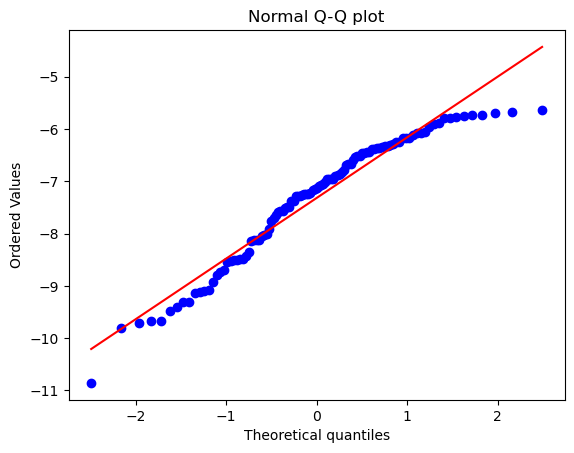

In [145]:
#Checking Normality

z = (Test_Y.reset_index(drop=True)-API.predict(Test_X_std) - Test_Y.reset_index(drop=True)-API.predict(Test_X_std).mean())/(Test_Y.reset_index(drop=True)-API.predict(Test_X_std)).std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

## POLYNOMIAL REGRESSION

In [146]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [147]:
poly_features = poly.fit_transform(Train_X.to_numpy())
poly_test_features = poly.transform(Test_X.to_numpy())

In [148]:
poly_reg_model = LinearRegression()

In [149]:
poly_reg_model.fit(poly_features, Train_Y)

LinearRegression()

In [150]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), poly_reg_model.predict(poly_test_features)))
R2_test = r2_score(Test_Y.reset_index(drop=True), poly_reg_model.predict(poly_test_features))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,330,600 |  R2: 0.650


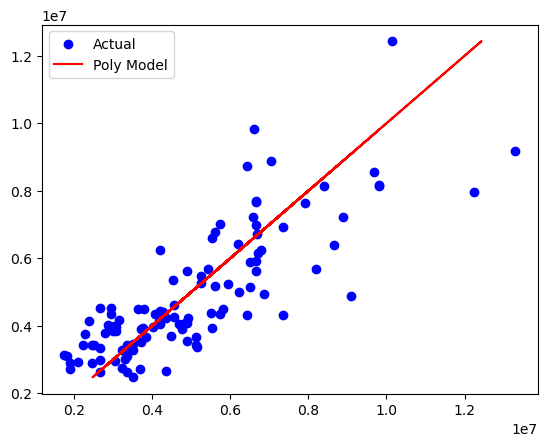

In [151]:
plt.scatter(Test_Y.reset_index(drop=True), poly_reg_model.predict(poly_test_features), color='b', label='Actual')
plt.plot(poly_reg_model.predict(poly_test_features), poly_reg_model.predict(poly_test_features), color='red', label='Poly Model')
plt.legend()
plt.show()

## Multiple Linear Regression(MLR)

In [152]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)

In [153]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), MLR.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), MLR.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,331,071 |  R2: 0.649


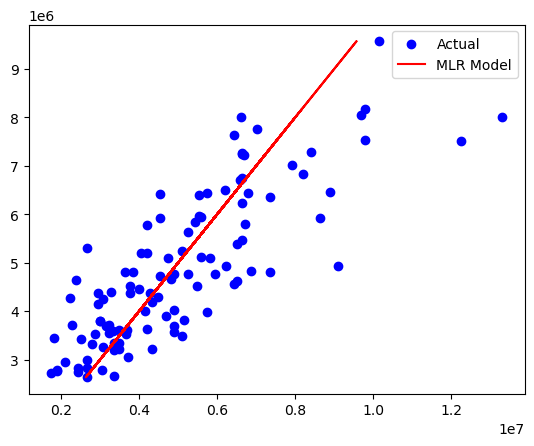

In [154]:
plt.scatter(Test_Y, MLR.predict(Test_X_std), color='b', label='Actual')
plt.plot(API.predict(Test_X_std), MLR.predict(Test_X_std), color='red', label='MLR Model')
plt.legend()
plt.show()

## Ridge Regression Model

In [155]:
RLR = Ridge().fit(Train_X_std,Train_Y)

In [156]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), RLR.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), RLR.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,331,290 |  R2: 0.649


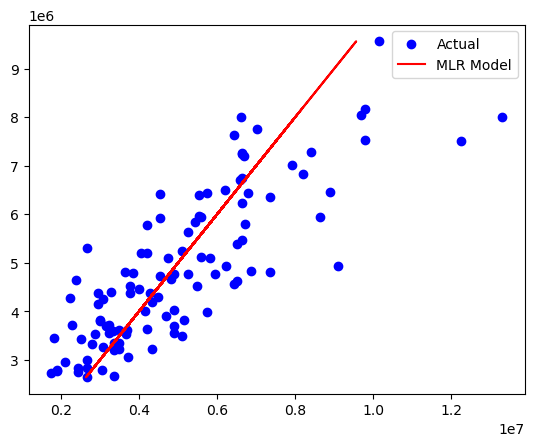

In [157]:
plt.scatter(Test_Y, RLR.predict(Test_X_std), color='b', label='Actual')
plt.plot(RLR.predict(Test_X_std), RLR.predict(Test_X_std), color='red', label='MLR Model')
plt.legend()
plt.show()

## Lasso Regression Model

In [158]:
LLR = Lasso().fit(Train_X_std,Train_Y)

In [159]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), LLR.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), LLR.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,331,072 |  R2: 0.649


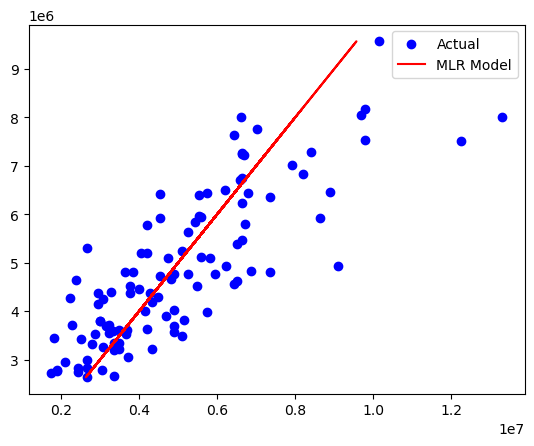

In [160]:
plt.scatter(Test_Y, LLR.predict(Test_X_std), color='b', label='Actual')
plt.plot(LLR.predict(Test_X_std), LLR.predict(Test_X_std), color='red', label='MLR Model')
plt.legend()
plt.show()

## Huber Regressor

In [161]:
HBR = HuberRegressor().fit(Train_X_std,Train_Y)

In [162]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), HBR.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), HBR.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,420,233 |  R2: 0.601


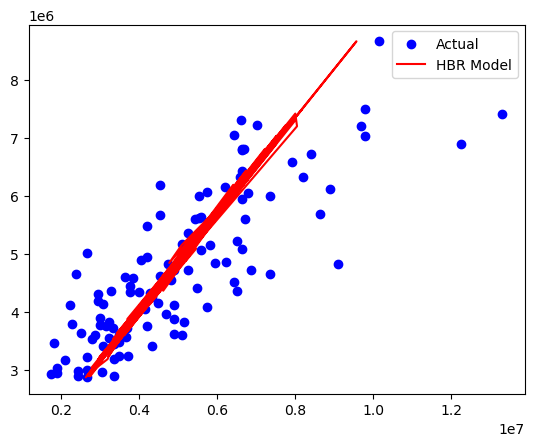

In [163]:
plt.scatter(Test_Y, HBR.predict(Test_X_std), color='b', label='Actual')
plt.plot(LLR.predict(Test_X_std), HBR.predict(Test_X_std), color='red', label='HBR Model')
plt.legend()
plt.show()

## MLP

In [57]:
mlp = MLPRegressor(random_state=42, max_iter=1_000, hidden_layer_sizes=(500,)).fit(Train_X_std,Train_Y)

C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), mlp.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), mlp.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 5,464,055 |  R2: -4.907


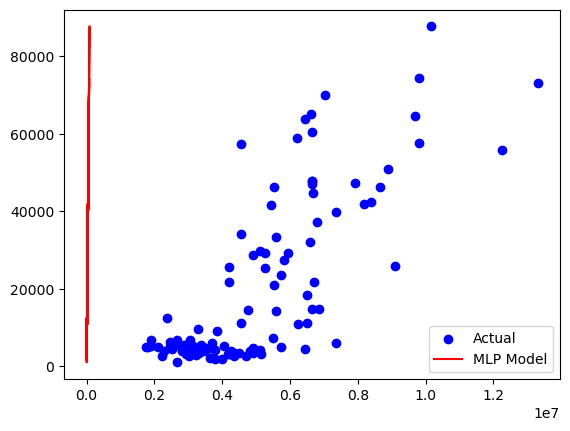

In [59]:
plt.scatter(Test_Y, mlp.predict(Test_X_std), color='b', label='Actual')
plt.plot(mlp.predict(Test_X_std), mlp.predict(Test_X_std), color='red', label='MLP Model')
plt.legend()
plt.show()

## SVR

In [60]:
regressorSVR = SVR(kernel='rbf', C=50_000, verbose=True, degree=5)
regressorSVR.fit(Train_X, Train_Y)
#predicting the results and reversing the scaling
#sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
prediction = regressorSVR.predict(Test_X)
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), prediction))
R2_test = r2_score(Test_Y.reset_index(drop=True), prediction)
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

[LibSVM]RMSE: 2,052,978 |  R2: 0.166


# IMPROVING THE FEATURES

## TAKING THE LOG FOR Y

In [61]:
X = raw_data_encoded.drop(['price'],axis=1)
Y = np.log10(raw_data_encoded['price'])
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 12) (545,) 
Training set  --->  (436, 12) (436,) 
Testing set   --->  (109, 12)  (109,)


In [62]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,436.000000
mean,1.222264e-16,1.629685e-16,7.333583e-17,6.926162e-17,1.711169e-16,9.778111e-17,-6.518741e-17,-4.889056e-17,0.000000,-6.518741e-17,-4.074213e-18,0.000000
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149
min,-1.591502e+00,-2.622298e+00,-5.579503e-01,-9.124989e-01,-2.456066e+00,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
25%,-7.058568e-01,-1.283514e+00,-5.579503e-01,-9.124989e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
50%,-2.970974e-01,5.527092e-02,-5.579503e-01,2.542152e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,0.079317
75%,5.476719e-01,5.527092e-02,1.539173e+00,2.542152e-01,4.071553e-01,-4.667731e-01,1.339728e+00,-2.305214e-01,1.501243,3.679566e-01,-5.526203e-01,1.409401
max,5.016775e+00,4.071624e+00,5.733420e+00,2.587644e+00,4.071553e-01,2.142369e+00,1.339728e+00,4.337993e+00,1.501243,2.709987e+00,1.809561e+00,1.409401



                                          Standardardization on Testing set                                          


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,-0.008182,0.042988,0.211636,0.136473,0.013134,-0.011969,-0.076556,-0.104782,0.089478,0.045659,0.010836,-0.067114
std,0.925314,0.937776,1.232791,1.052500,0.990922,0.994422,0.978521,0.750868,1.037592,1.043399,1.011379,1.060667
min,-1.568793,-1.283514,-0.557950,-0.912499,-2.456066,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
25%,-0.760358,0.055271,-0.557950,-0.912499,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
50%,-0.074551,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,0.079317
75%,0.547672,0.055271,1.539173,0.254215,0.407155,-0.466773,1.339728,-0.230521,1.501243,0.367957,-0.552620,1.409401
max,3.654243,2.732840,3.636297,2.587644,0.407155,2.142369,1.339728,4.337993,1.501243,2.709987,1.809561,1.409401


In [63]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format('price',' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     81.41
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          7.37e-102
Time:                        16:56:51   Log-Likelihood:                 460.31
No. Observations:                 436   AIC:                            -894.6
Df Residuals:                     423   BIC:                            -841.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6452      0.004   1623.404      0.000       6.637       6.653
area                 0.0459      0.005      9.790      0.000       0.037       0.055
bedrooms             0.0070      0.005      1.452      0.147      -0.002       0.016
bathrooms            0.0391      0.005      8.390      0.000       0.030       0.048
stories              0.0304      0.005      6.035      0.000       0.021       0.040
mainroad             0.0169      0.004      3.784      0.000       0.008       0.026
guestroom            0.0092      0.005      1.989      0.047       0.000       0.018
basement             0.0210      0.005      4.370      0.000       0.012       0.030
hotwaterheating      0.0126      0.004      3.016      0.003       0.004       0.021
airconditioning      0.0308      0.005      6.702      0.000       0.022       0.040
parking              0.0139      0.005      3.088      0.002       0.005       0.023
prefarea             0.0231      0.004      5.280      0.000       0.015       0.032
furnishingstatus     0.0187      0.004      4.332      0.000       0.010       0.027
==============================================================================
Omnibus:                        7.027   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.094
Skew:                          -0.083   Prob(JB):                      0.00643
Kurtosis:                       3.727   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), API.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), API.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 0 |  R2: 0.656


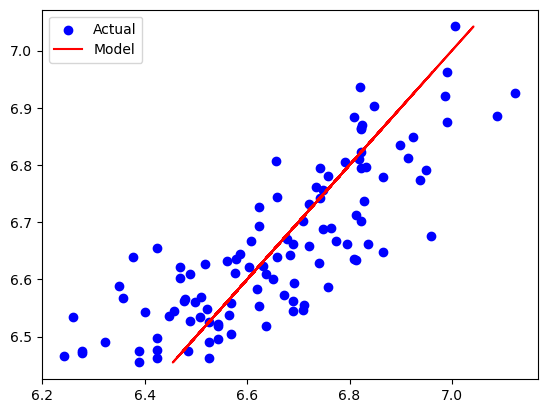

In [65]:
plt.scatter(Test_Y, API.predict(Test_X_std), color='b', label='Actual')
plt.plot(API.predict(Test_X_std), API.predict(Test_X_std), color='red', label='Model')
plt.legend()
plt.show()

## EXPLORING OTHER FEATURES

C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\1039351505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data.area,
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


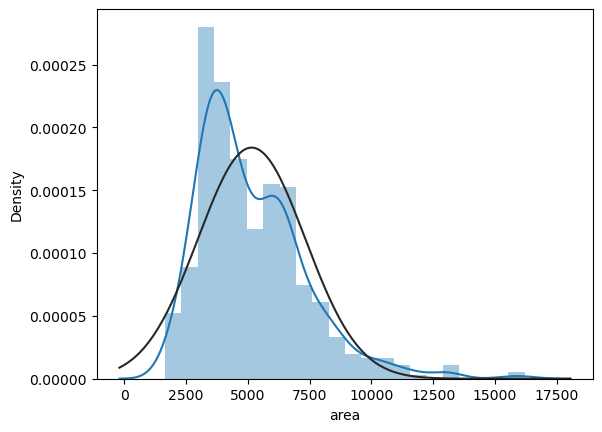

In [66]:
sns.distplot(raw_data.area, 
             kde=True, 
             fit=norm,)
plt.show();

C:\Users\mahmo\AppData\Local\Temp\ipykernel_28028\660136051.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(raw_data.area),
C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


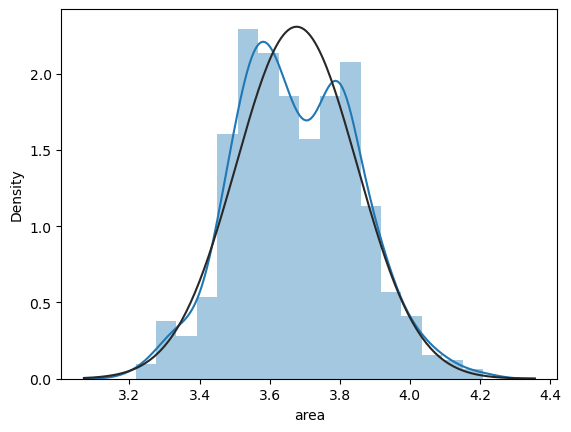

In [67]:
sns.distplot(np.log10(raw_data.area), 
             kde=True, 
             fit=norm,)
plt.show();

In [68]:
X = raw_data_encoded.drop(['price'],axis=1)
X.area = np.log10(X.area)
# Y = np.log10(raw_data_encoded['price'])
Y = raw_data_encoded['price']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 12) (545,) 
Training set  --->  (436, 12) (436,) 
Testing set   --->  (109, 12)  (109,)


In [69]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,436.000000
mean,9.615143e-16,1.629685e-16,7.333583e-17,6.926162e-17,1.711169e-16,9.778111e-17,-6.518741e-17,-4.889056e-17,0.000000,-6.518741e-17,-4.074213e-18,0.000000
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149
min,-2.660896e+00,-2.622298e+00,-5.579503e-01,-9.124989e-01,-2.456066e+00,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
25%,-6.988120e-01,-1.283514e+00,-5.579503e-01,-9.124989e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
50%,-1.376102e-01,5.527092e-02,-5.579503e-01,2.542152e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,0.079317
75%,7.324499e-01,5.527092e-02,1.539173e+00,2.542152e-01,4.071553e-01,-4.667731e-01,1.339728e+00,-2.305214e-01,1.501243,3.679566e-01,-5.526203e-01,1.409401
max,3.083914e+00,4.071624e+00,5.733420e+00,2.587644e+00,4.071553e-01,2.142369e+00,1.339728e+00,4.337993e+00,1.501243,2.709987e+00,1.809561e+00,1.409401



                                          Standardardization on Testing set                                          


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,-0.000144,0.042988,0.211636,0.136473,0.013134,-0.011969,-0.076556,-0.104782,0.089478,0.045659,0.010836,-0.067114
std,1.008410,0.937776,1.232791,1.052500,0.990922,0.994422,0.978521,0.750868,1.037592,1.043399,1.011379,1.060667
min,-2.585816,-1.283514,-0.557950,-0.912499,-2.456066,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
25%,-0.784074,0.055271,-0.557950,-0.912499,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
50%,0.122334,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,0.079317
75%,0.732450,0.055271,1.539173,0.254215,0.407155,-0.466773,1.339728,-0.230521,1.501243,0.367957,-0.552620,1.409401
max,2.568860,2.732840,3.636297,2.587644,0.407155,2.142369,1.339728,4.337993,1.501243,2.709987,1.809561,1.409401


In [70]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format('price',' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     79.38
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.91e-100
Time:                        16:56:52   Log-Likelihood:                -6630.6
No. Observations:                 436   AIC:                         1.329e+04
Df Residuals:                     423   BIC:                         1.334e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.707e+06   4.73e+04     99.411      0.000    4.61e+06     4.8e+06
area              5.625e+05   5.58e+04     10.077      0.000    4.53e+05    6.72e+05
bedrooms          5.987e+04   5.56e+04      1.077      0.282   -4.94e+04    1.69e+05
bathrooms         5.197e+05   5.39e+04      9.640      0.000    4.14e+05    6.26e+05
stories           3.474e+05   5.83e+04      5.962      0.000    2.33e+05    4.62e+05
mainroad           9.25e+04   5.22e+04      1.771      0.077   -1.02e+04    1.95e+05
guestroom         5.866e+04   5.37e+04      1.092      0.275   -4.69e+04    1.64e+05
basement          1.983e+05   5.57e+04      3.558      0.000    8.88e+04    3.08e+05
hotwaterheating   1.523e+05   4.82e+04      3.158      0.002    5.75e+04    2.47e+05
airconditioning   3.375e+05   5.35e+04      6.311      0.000    2.32e+05    4.43e+05
parking           1.804e+05   5.23e+04      3.449      0.001    7.76e+04    2.83e+05
prefarea          2.835e+05   5.04e+04      5.624      0.000    1.84e+05    3.83e+05
furnishingstatus  1.676e+05   4.98e+04      3.364      0.001    6.97e+04    2.66e+05
==============================================================================
Omnibus:                       78.161   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.880
Skew:                           0.866   Prob(JB):                     2.66e-46
Kurtosis:                       5.925   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), API.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), API.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,336,031 |  R2: 0.647


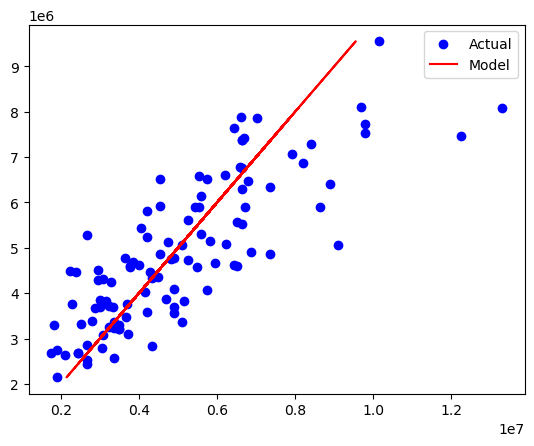

In [72]:
plt.scatter(Test_Y, API.predict(Test_X_std), color='b', label='Actual')
plt.plot(API.predict(Test_X_std), API.predict(Test_X_std), color='red', label='Model')
plt.legend()
plt.show()

## REMOVING LESS SIGNFICANT FEATURES

In [73]:
X = raw_data_encoded.drop(['price', 'bedrooms', 'guestroom'],axis=1)
X.area = np.log10(X.area)
# Y = np.log10(raw_data_encoded['price'])
Y = raw_data_encoded['price']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 10) (545,) 
Training set  --->  (436, 10) (436,) 
Testing set   --->  (109, 10)  (109,)


In [74]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,436.000000
mean,9.615143e-16,7.333583e-17,6.926162e-17,1.711169e-16,-6.518741e-17,-4.889056e-17,0.000000,-6.518741e-17,-4.074213e-18,0.000000
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149
min,-2.660896e+00,-5.579503e-01,-9.124989e-01,-2.456066e+00,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
25%,-6.988120e-01,-5.579503e-01,-9.124989e-01,4.071553e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
50%,-1.376102e-01,-5.579503e-01,2.542152e-01,4.071553e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,0.079317
75%,7.324499e-01,1.539173e+00,2.542152e-01,4.071553e-01,1.339728e+00,-2.305214e-01,1.501243,3.679566e-01,-5.526203e-01,1.409401
max,3.083914e+00,5.733420e+00,2.587644e+00,4.071553e-01,1.339728e+00,4.337993e+00,1.501243,2.709987e+00,1.809561e+00,1.409401



                                          Standardardization on Testing set                                          


,area,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,-0.000144,0.211636,0.136473,0.013134,-0.076556,-0.104782,0.089478,0.045659,0.010836,-0.067114
std,1.008410,1.232791,1.052500,0.990922,0.978521,0.750868,1.037592,1.043399,1.011379,1.060667
min,-2.585816,-0.557950,-0.912499,-2.456066,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
25%,-0.784074,-0.557950,-0.912499,0.407155,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
50%,0.122334,-0.557950,0.254215,0.407155,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,0.079317
75%,0.732450,1.539173,0.254215,0.407155,1.339728,-0.230521,1.501243,0.367957,-0.552620,1.409401
max,2.568860,3.636297,2.587644,0.407155,1.339728,4.337993,1.501243,2.709987,1.809561,1.409401


In [75]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format('price',' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     94.97
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          9.42e-102
Time:                        16:56:52   Log-Likelihood:                -6631.8
No. Observations:                 436   AIC:                         1.329e+04
Df Residuals:                     425   BIC:                         1.333e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.707e+06   4.74e+04     99.378      0.000    4.61e+06     4.8e+06
area              5.781e+05   5.47e+04     10.571      0.000    4.71e+05    6.86e+05
bathrooms         5.339e+05   5.22e+04     10.237      0.000    4.31e+05    6.36e+05
stories           3.739e+05   5.46e+04      6.845      0.000    2.67e+05    4.81e+05
mainroad          8.608e+04   5.19e+04      1.657      0.098    -1.6e+04    1.88e+05
basement          2.289e+05    5.1e+04      4.485      0.000    1.29e+05    3.29e+05
hotwaterheating   1.519e+05   4.82e+04      3.148      0.002     5.7e+04    2.47e+05
airconditioning   3.404e+05   5.34e+04      6.368      0.000    2.35e+05    4.45e+05
parking           1.796e+05   5.21e+04      3.451      0.001    7.73e+04    2.82e+05
prefarea            2.9e+05   5.02e+04      5.771      0.000    1.91e+05    3.89e+05
furnishingstatus  1.691e+05   4.98e+04      3.394      0.001    7.11e+04    2.67e+05
==============================================================================
Omnibus:                       82.525   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.375
Skew:                           0.895   Prob(JB):                     2.11e-51
Kurtosis:                       6.105   Cond. No.                         2.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), API.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), API.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,347,950 |  R2: 0.641


## PCA

In [77]:
X = raw_data_encoded.drop(['price'],axis=1)
Y = raw_data_encoded['price']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 12) (545,) 
Training set  --->  (436, 12) (436,) 
Testing set   --->  (109, 12)  (109,)


In [78]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,436.000000
mean,1.222264e-16,1.629685e-16,7.333583e-17,6.926162e-17,1.711169e-16,9.778111e-17,-6.518741e-17,-4.889056e-17,0.000000,-6.518741e-17,-4.074213e-18,0.000000
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149
min,-1.591502e+00,-2.622298e+00,-5.579503e-01,-9.124989e-01,-2.456066e+00,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
25%,-7.058568e-01,-1.283514e+00,-5.579503e-01,-9.124989e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,-1.250768
50%,-2.970974e-01,5.527092e-02,-5.579503e-01,2.542152e-01,4.071553e-01,-4.667731e-01,-7.464200e-01,-2.305214e-01,-0.666115,-8.030587e-01,-5.526203e-01,0.079317
75%,5.476719e-01,5.527092e-02,1.539173e+00,2.542152e-01,4.071553e-01,-4.667731e-01,1.339728e+00,-2.305214e-01,1.501243,3.679566e-01,-5.526203e-01,1.409401
max,5.016775e+00,4.071624e+00,5.733420e+00,2.587644e+00,4.071553e-01,2.142369e+00,1.339728e+00,4.337993e+00,1.501243,2.709987e+00,1.809561e+00,1.409401



                                          Standardardization on Testing set                                          


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,-0.008182,0.042988,0.211636,0.136473,0.013134,-0.011969,-0.076556,-0.104782,0.089478,0.045659,0.010836,-0.067114
std,0.925314,0.937776,1.232791,1.052500,0.990922,0.994422,0.978521,0.750868,1.037592,1.043399,1.011379,1.060667
min,-1.568793,-1.283514,-0.557950,-0.912499,-2.456066,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
25%,-0.760358,0.055271,-0.557950,-0.912499,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,-1.250768
50%,-0.074551,0.055271,-0.557950,0.254215,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.803059,-0.552620,0.079317
75%,0.547672,0.055271,1.539173,0.254215,0.407155,-0.466773,1.339728,-0.230521,1.501243,0.367957,-0.552620,1.409401
max,3.654243,2.732840,3.636297,2.587644,0.407155,2.142369,1.339728,4.337993,1.501243,2.709987,1.809561,1.409401


In [79]:
pca = PCA().fit(Train_X_std)

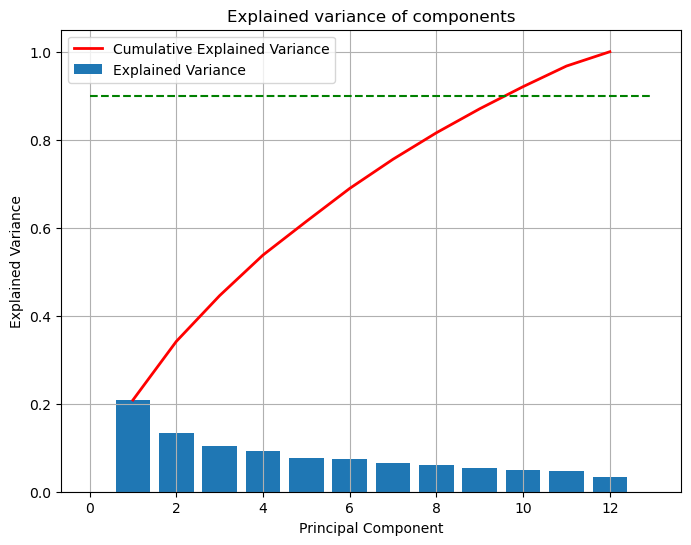

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)

ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [81]:
pca = PCA(n_components=1)
Train_X_std_pca = pca.fit_transform(Train_X_std)
Test_X_std_pca = pca.fit_transform(Test_X_std)

In [82]:
Train_X_std_pca

array([[ 2.28385659],
       [ 2.14370484],
       [ 0.38063067],
       [-0.71262452],
       [-1.439305  ],
       [-0.47957845],
       [-1.42282945],
       [-2.34860446],
       [-2.66098094],
       [-1.05391427],
       [-1.60047027],
       [-1.61414059],
       [ 0.56961034],
       [-0.71682641],
       [-0.50433687],
       [ 0.3945559 ],
       [-2.419098  ],
       [ 0.98624563],
       [-1.96175847],
       [ 3.14812447],
       [ 2.40119951],
       [-1.19247939],
       [ 0.31335296],
       [ 2.41505558],
       [ 1.58597964],
       [-1.45578056],
       [-3.05264053],
       [-1.38672044],
       [ 0.50308414],
       [-2.35191343],
       [-0.57404705],
       [-2.59690114],
       [-0.41563147],
       [ 1.05892036],
       [-0.44809094],
       [-1.18434774],
       [-3.00403765],
       [ 1.79742796],
       [ 0.46689537],
       [ 1.94307307],
       [ 2.52521245],
       [ 0.09115149],
       [-0.03186228],
       [-0.67949059],
       [-1.47591642],
       [-1

In [83]:
LR = LinearRegression()
LR.fit(Train_X_std_pca, Train_Y)

LinearRegression()

In [84]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), LR.predict(Test_X_std_pca)))
R2_test = r2_score(Test_Y.reset_index(drop=True), LR.predict(Test_X_std_pca))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,435,518 |  R2: 0.592


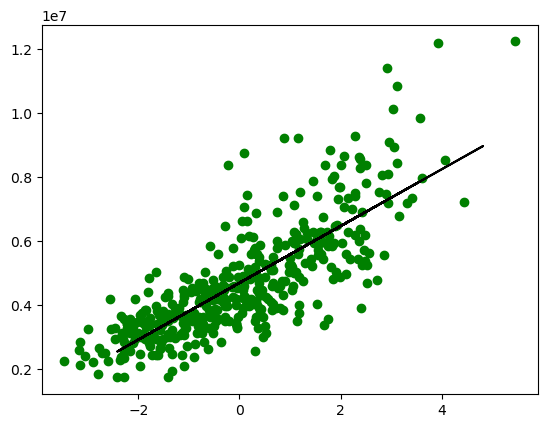

In [85]:
y_pred = LR.predict(Test_X_std_pca)

plt.scatter(Train_X_std_pca, Train_Y, color='g')
plt.plot(Test_X_std_pca, y_pred, color='k')
plt.show();

# FEATURES ENGINEERING

In [86]:
raw_data_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [87]:
X = raw_data_encoded.drop(['price'],axis=1)
X['bedrooms_e'] = np.exp(X.bedrooms)
X['value'] = X.bathrooms * X.stories * 100
X.area = np.log10(X.area)
# Y = np.log10(raw_data_encoded['price'])
Y = raw_data_encoded['price']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 14) (545,) 
Training set  --->  (436, 14) (436,) 
Testing set   --->  (109, 14)  (109,)


In [88]:
#Feature Scaling (Standardization)

std = MinMaxScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms_e,value
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.463183,0.391743,0.088685,0.260703,0.857798,0.178899,0.357798,0.050459,0.307339,0.228593,0.233945,0.470183,0.060156,0.092355
std,0.174270,0.149561,0.159130,0.286031,0.349658,0.383708,0.479903,0.219141,0.461921,0.284980,0.423824,0.376348,0.085758,0.123932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341540,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011656,0.000000
50%,0.439229,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.043341,0.066667
75%,0.590680,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,0.043341,0.133333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



                                          Standardardization on Testing set                                          


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms_e,value
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.463158,0.398165,0.122324,0.299694,0.862385,0.174312,0.321101,0.027523,0.348624,0.241590,0.238532,0.444954,0.057754,0.118654
std,0.175534,0.140094,0.195949,0.300702,0.346086,0.381130,0.469056,0.164357,0.478736,0.297007,0.428155,0.398722,0.057409,0.144689
min,0.013069,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011656,0.000000
25%,0.326699,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043341,0.000000
50%,0.484477,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.043341,0.066667
75%,0.590680,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,0.043341,0.200000
max,0.910344,0.800000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.363591,0.733333


In [89]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format('price',' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     68.19
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           8.53e-99
Time:                        16:56:53   Log-Likelihood:                -6629.6
No. Observations:                 436   AIC:                         1.329e+04
Df Residuals:                     421   BIC:                         1.335e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.327e+06   2.25e+05      5.889      0.000    8.84e+05    1.77e+06
area              3.181e+06   3.23e+05      9.836      0.000    2.55e+06    3.82e+06
bedrooms          3.406e+05   5.83e+05      0.585      0.559   -8.04e+05    1.49e+06
bathrooms         2.336e+06   7.75e+05      3.015      0.003    8.13e+05    3.86e+06
stories           6.109e+05   5.11e+05      1.195      0.233   -3.94e+05    1.62e+06
mainroad          2.712e+05    1.5e+05      1.809      0.071   -2.35e+04    5.66e+05
guestroom          1.49e+05    1.4e+05      1.064      0.288   -1.26e+05    4.24e+05
basement          4.427e+05   1.18e+05      3.747      0.000     2.1e+05    6.75e+05
hotwaterheating   7.005e+05    2.2e+05      3.177      0.002    2.67e+05    1.13e+06
airconditioning   7.385e+05   1.16e+05      6.361      0.000     5.1e+05    9.67e+05
parking           6.249e+05   1.85e+05      3.385      0.001    2.62e+05    9.88e+05
prefarea          6.812e+05    1.2e+05      5.690      0.000    4.46e+05    9.16e+05
furnishingstatus  4.309e+05   1.33e+05      3.241      0.001     1.7e+05    6.92e+05
bedrooms_e         3.57e+05   8.92e+05      0.400      0.689    -1.4e+06    2.11e+06
value             2.165e+06   1.62e+06      1.338      0.182   -1.02e+06    5.35e+06
==============================================================================
Omnibus:                       84.992   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.082
Skew:                           0.935   Prob(JB):                     6.62e-51
Kurtosis:                       6.037   Cond. No.                         66.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
rmse_test = np.sqrt(mean_squared_error(Test_Y.reset_index(drop=True), API.predict(Test_X_std)))
R2_test = r2_score(Test_Y.reset_index(drop=True), API.predict(Test_X_std))
print(f'RMSE: {rmse_test:,.0f} |  R2: {R2_test:0.03f}')

RMSE: 1,335,057 |  R2: 0.647


## NEURAL NETWORKS ANN

In [91]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [92]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [93]:
#Hyper Parameters for regression
optim = ['Adadelta','Adagrad','Adam','Ftrl','RMSprop','SGD']
loss_function = ['MeanAbsoluteError', 'MeanSquaredError', 'MeanSquaredLogarithmicError', 'MeanAbsolutePercentageError']
metric = ['MeanSquaredError','MeanAbsoluteError','MeanAbsolutePercentageError','cosine_proximity', RSquare(), root_mean_squared_error]
activation = ['elu','exponential','gelu','relu','selu','tanh']
activation_HL = ['elu','exponential','gelu','relu','selu','tanh']
activation_out = ['elu','exponential','linear','relu','tanh']

In [94]:
Train_Y = Train_Y.to_numpy().reshape(Train_Y.shape[0], 1)
Test_Y = Test_Y.to_numpy().reshape(Test_Y.shape[0], 1)
Train_X_std = Train_X_std.to_numpy()
Test_X_std = Test_X_std.to_numpy()

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=Train_X_std.shape[1], activation=activation[-1]))
ann.add(tf.keras.layers.Dense(units=100,activation=activation[2], 
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    # bias_regularizer=regularizers.L2(1e-4),
    # activity_regularizer=regularizers.L2(1e-5)
))
ann.add(tf.keras.layers.Dense(units=50,activation=activation[2],
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    # bias_regularizer=regularizers.L2(1e-4),
    # activity_regularizer=regularizers.L2(1e-5)
))
ann.add(tf.keras.layers.Dense(units=25,activation=activation[2], 
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    # bias_regularizer=regularizers.L2(1e-4),
    # activity_regularizer=regularizers.L2(1e-5)
))
ann.add(tf.keras.layers.Dense(units=10,activation=activation[2], 
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    # bias_regularizer=regularizers.L2(1e-4),
    # activity_regularizer=regularizers.L2(1e-5)
))
ann.add(tf.keras.layers.Dense(units=Train_Y.shape[1], activation=activation[4]))
ann.compile(optimizer=optim[2], loss=loss_function[-2], metrics=metric[2])
history = ann.fit(Train_X_std, Train_Y, batch_size = 32, epochs = 5_000, verbose=2, validation_data=(Test_X_std, Test_Y))
y_pred = ann.predict(Test_X_std)
ann.summary()

Epoch 1/5000
14/14 - 2s - loss: 230.9274 - mean_absolute_percentage_error: 100.0000 - val_loss: 225.6344 - val_mean_absolute_percentage_error: 100.0000 - 2s/epoch - 130ms/step
Epoch 2/5000
14/14 - 0s - loss: 216.5254 - mean_absolute_percentage_error: 100.0000 - val_loss: 205.1402 - val_mean_absolute_percentage_error: 100.0000 - 34ms/epoch - 2ms/step
Epoch 3/5000
14/14 - 0s - loss: 192.3401 - mean_absolute_percentage_error: 99.9999 - val_loss: 178.4279 - val_mean_absolute_percentage_error: 99.9999 - 37ms/epoch - 3ms/step
Epoch 4/5000
14/14 - 0s - loss: 166.8034 - mean_absolute_percentage_error: 99.9997 - val_loss: 155.2176 - val_mean_absolute_percentage_error: 99.9996 - 36ms/epoch - 3ms/step
Epoch 5/5000
14/14 - 0s - loss: 145.9193 - mean_absolute_percentage_error: 99.9994 - val_loss: 136.6759 - val_mean_absolute_percentage_error: 99.9991 - 37ms/epoch - 3ms/step
Epoch 6/5000
14/14 - 0s - loss: 129.1464 - mean_absolute_percentage_error: 99.9988 - val_loss: 121.7806 - val_mean_absolute_pe

In [112]:
y_pred = ann.predict(Test_X_std)
print('R2 Score = ' ,r2_score(Test_Y, y_pred))

4/4 [==============================] - 0s 1ms/step
R2 Score =  0.535279932576275


In [113]:
list(history.history.keys())

['loss',
 'mean_absolute_percentage_error',
 'val_loss',
 'val_mean_absolute_percentage_error']

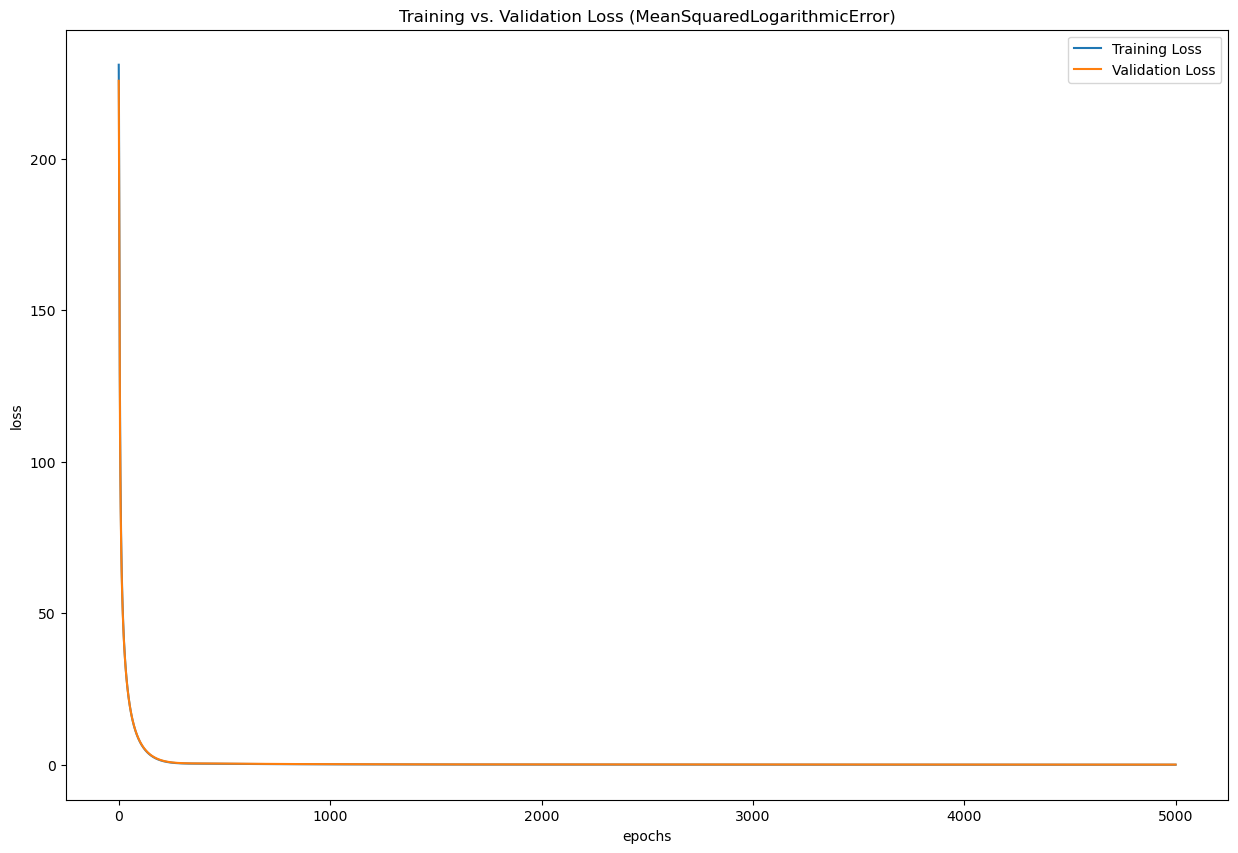

In [114]:
plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[0]],label='Training Loss')
plt.plot(history.history[list(history.history.keys())[2]],label='Validation Loss')
plt.title(f'Training vs. Validation Loss ({loss_function[-2]})')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Max Train mean_absolute_percentage_error:  100.0  | Max Val mean_absolute_percentage_error:  99.99998474121094


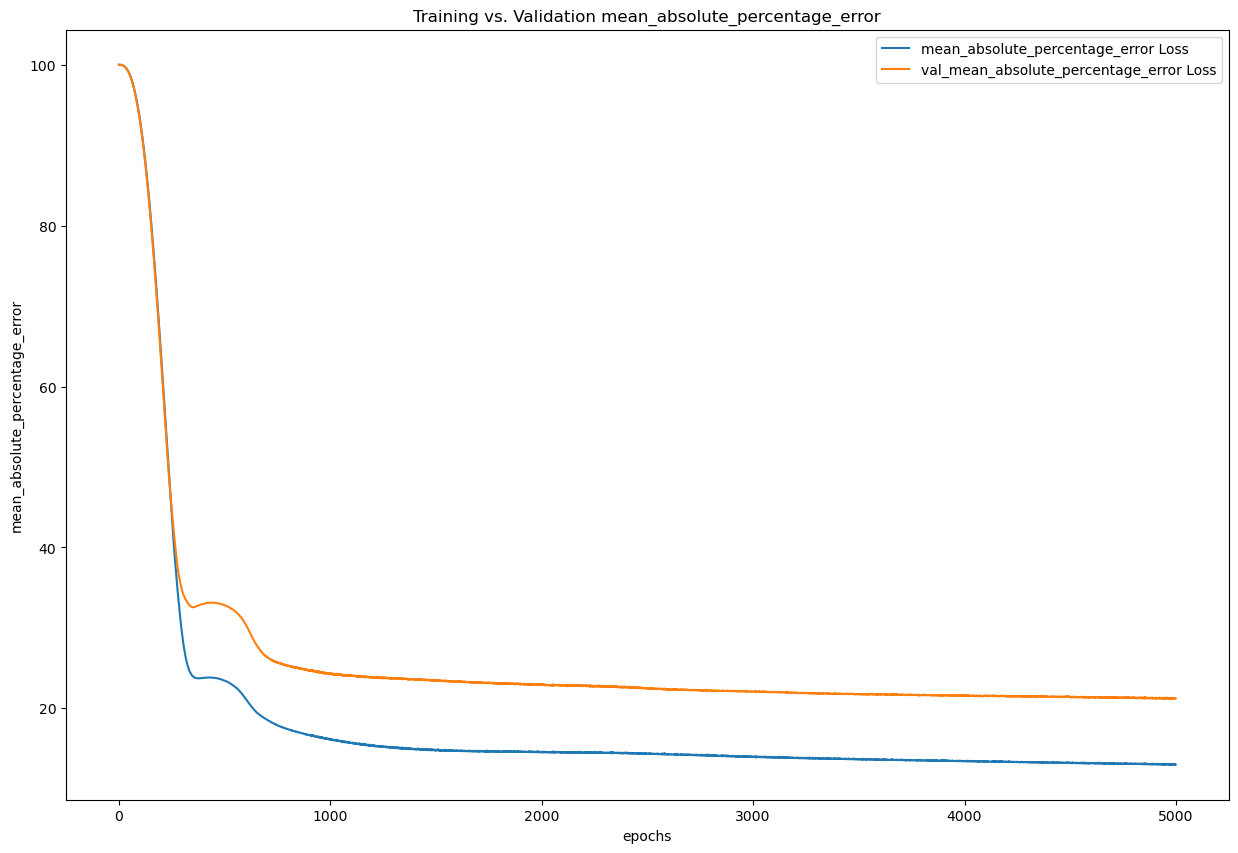

In [115]:
print(f'Max Train {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[1]]), f' | Max Val {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[-1]]))
plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[1]],label=f'{list(history.history.keys())[1]} Loss')
plt.plot(history.history[list(history.history.keys())[-1]],label=f'{list(history.history.keys())[-1]} Loss')
plt.title(f'Training vs. Validation {list(history.history.keys())[1]}')
plt.xlabel('epochs')
plt.ylabel(f'{list(history.history.keys())[1]}')
# plt.ylim(0, 1)
plt.legend()
plt.show()

In [116]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=Train_X_std.shape[1], activation=activation[-1]))
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units1 = hp.Int('units1', min_value=32, max_value=1024, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
    hp_units4 = hp.Int('units4', min_value=1, max_value=20, step=1)
    hp_optimizer = hp.Choice('optimizer', optim)
    
    model.add(tf.keras.layers.Dense(units=hp_units1,activation=activation[2], ))
    model.add(tf.keras.layers.Dense(units=hp_units2,activation=activation[2], ))
    model.add(tf.keras.layers.Dense(units=hp_units3,activation=activation[2], ))
    model.add(tf.keras.layers.Dense(units=hp_units4,activation=activation[2], ))
    
    model.add(tf.keras.layers.Dense(units=Train_Y.shape[1], activation=activation[4]))

    model.compile(
        optimizer=hp_optimizer,
        loss=loss_function[-2],
        metrics=metric[2]
    )

    return model

In [117]:
build_model(kt.HyperParameters())

In [118]:
metric[2]

'MeanAbsolutePercentageError'

In [119]:
# HyperBand algorithm from keras tuner
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_mean_squared_error',
#     max_epochs=50_000,
#     directory='keras_tuner_dir',
#     project_name='keras_tuner_demo',
#     seed=seed_value
# )

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective=f'val_mean_absolute_percentage_error',
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="tuner_params",
)

In [120]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'Adadelta', 'conditions': [], 'values': ['Adadelta', 'Adagrad', 'Adam', 'Ftrl', 'RMSprop', 'SGD'], 'ordered': False}


In [121]:
# tuner.search(Train_X_std, Train_Y, epochs=2, validation_split=0.2)
tuner.search(Train_X_std, Train_Y, epochs=1_000, validation_data=(Test_X_std, Test_Y))

Trial 3 Complete [00h 01m 28s]
val_mean_absolute_percentage_error: 60.5044059753418

Best val_mean_absolute_percentage_error So Far: 21.495868682861328
Total elapsed time: 00h 05m 22s


In [122]:
tuner.results_summary()

Results summary
Results in my_dir\tuner_params
Showing 10 best trials
Objective(name="val_mean_absolute_percentage_error", direction="min")

Trial 1 summary
Hyperparameters:
units1: 384
units2: 96
units3: 128
units4: 1
optimizer: Adam
Score: 21.495868682861328

Trial 2 summary
Hyperparameters:
units1: 256
units2: 96
units3: 352
units4: 3
optimizer: RMSprop
Score: 60.5044059753418

Trial 0 summary
Hyperparameters:
units1: 96
units2: 416
units3: 192
units4: 5
optimizer: Adadelta
Score: 98.57059478759766


In [123]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.get_config()
# best_model.summary()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 14,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 384,
    'activation': 'gelu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUnifo

In [130]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((Train_X_std, Test_X_std))
y_all = np.concatenate((Train_Y, Test_Y))
history = model.fit(x=x_all, y=y_all, epochs=1_000)

Epoch 1/1000
18/18 [==============================] - 1s 1ms/step - loss: 214.3552 - mean_absolute_percentage_error: 100.0000
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 159.1918 - mean_absolute_percentage_error: 99.9996
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 120.7713 - mean_absolute_percentage_error: 99.9981
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 98.2788 - mean_absolute_percentage_error: 99.9947
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 83.3542 - mean_absolute_percentage_error: 99.9885
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 72.4859 - mean_absolute_percentage_error: 99.9788
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 64.1372 - mean_absolute_percentage_error: 99.9650
Epoch 8/1000
18/18 [==============================] - 0s 1ms/step - loss: 57.5203 - mean_absolute_percentage_error: 99.9468
Epoc

In [131]:
y_pred = model.predict(Test_X_std)
print('R2 Score = ' ,r2_score(Test_Y, y_pred))

4/4 [==============================] - 0s 1000us/step
R2 Score =  0.6690553691244645


In [134]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error'])

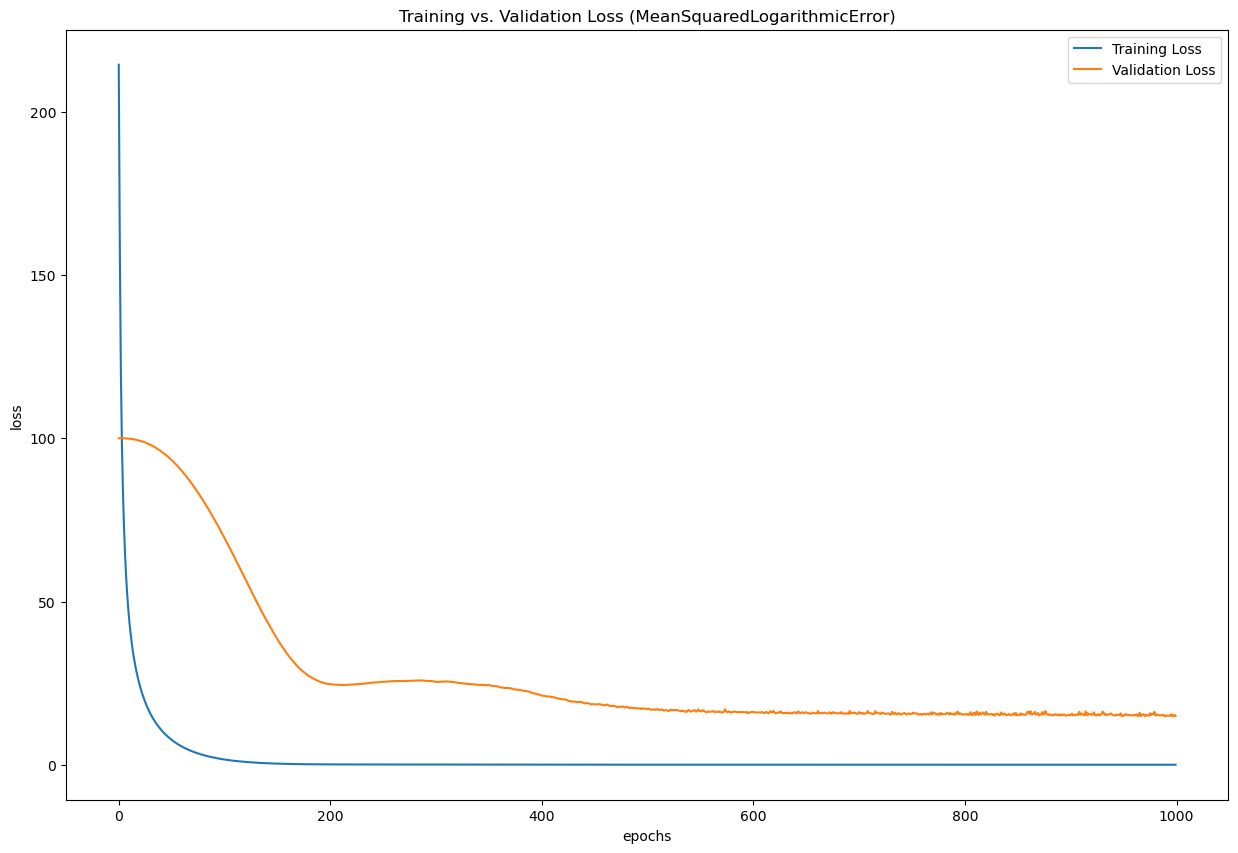

In [135]:
plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[0]],label='Training Loss')
plt.plot(history.history[list(history.history.keys())[1]],label='Validation Loss')
plt.title(f'Training vs. Validation Loss ({loss_function[-2]})')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()